# Perdida\_Clientes

## Enlace de datos
https://www.kaggle.com/datasets/datacertlaboratoria/proyecto-5-prdida-de-clientes-en-telco/data

## Texto del problema propuesto

La pérdida de clientes es uno de los problemas más fundamentales del aprendizaje automático.
En este conjunto de datos de clientes, podrás predecir el churn de un proveedor de telecomunicaciones basándote en los datos de uso de sus clientes.
El conjunto de datos incluye una variedad de características, como fallos en las llamadas, duración de la suscripción y valor del cliente,
lo que lo convierte en un rico recurso para el análisis en profundidad. El proyecto para principiantes viene con retos guiados centrados en la exploración de datos,
la visualización y el análisis estadístico, proporcionando una ruta de aprendizaje estructurada.
El escenario del mundo real añade una capa extra de complejidad y relevancia, al pedirte que predigas la pérdida de clientes ante un nuevo competidor en el mercado.

## 7. PREGUNTAS QUE VAMOS A RESPONDER

#### 7.1 DONDE HEMOS PERDIDO MAS CLIENTE
#### 7.2 DONDE HEMOS PERDIDO MAS CLIENTE EN PORCENTAJE
#### 7.3 CUAL ES LA CAUSA PRINCIPAL
#### 7.4 CUAL ES EL PORCENTAJE DE PERDIDAS POR ESTA CAUSA
#### 7.5 ACEPTAR OFERTAS AFECTA EN EL ABANDONO
#### 7.6 QUE OFERTA HACE MES LEALES A LOS CONSUMIDORES
#### 7.7 DE LOS PERMANENTES, CUAL ES EL TIEMPO DE MEDIA
#### 7.8 CUAL ES EL CONTRATO PREFERIDO DE LOS CLIENTES LEALES
#### 7.9 AFECTA LOS CARGOS FUERA DE CUOTA AL MANTENIMIENTO DE CONTRATO
#### 7.10 CUAL ES EL TIEMPO MEDIO DE PERMANENCIA DE LOS QUE ABANDONAN
#### 7.11 CUAL ES EL PERFIL DE USUARIO QUE ABANDONA
#### 7.12 PODEMOS PREDECIR SI SE IRA UN CLIENTE

## En este caso responederemos a la **pregunta 12**, ademas haremos la **limpieza de datos** para la prediccion

---
---
---

# 1. CARGA DE LIBRERIAS

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, ConfusionMatrixDisplay, f1_score, fbeta_score, RocCurveDisplay, roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
---
---

# 2. CARGA DEL PRIMER CSV Y ESTUDIO DEL MISMO

- Customer ID             --> id titular
- Count                   --> numero de conteo
- Gender                  --> genero femenino masculino
- Age                     --> edad
- Under 30                --> menos de 30 si no
- Senior Citizen          --> mas de 65 si no
- Married                 --> casado si no
- Dependents              --> vive con personas dependientes (hijos abuelos)
- Number of Dependents    --> numero de personas dependientes

In [62]:

demografico = pd.read_csv("/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/1-CHURN/archive/1-Telco_customer_churn_demographics.csv")
print(demografico)

     Customer ID  Count  Gender  Age Under 30 Senior Citizen Married  \
0     8779-QRDMV      1       M   78       No            Yes      No   
1     7495-OOKFY      1       F   74       No            Yes     Yes   
2     1658-BYGOY      1       M   71       No            Yes      No   
3     4598-XLKNJ      1       F   78       No            Yes     Yes   
4     4846-WHAFZ      1       F   80       No            Yes     Yes   
...          ...    ...     ...  ...      ...            ...     ...   
7038  3389-KTRXV      1  Female  115       No             No     Yes   
7039  4020-KIUDI      1    Male  108       No             No     Yes   
7040  0970-QXPXW      1  Female  116      Yes             No      No   
7041  2133-TSRRM      1  Female  109       No             No      No   
7042  6447-GORXK      1    Male  108      Yes             No      No   

     Dependents  Number of Dependents  
0            No                     0  
1           Yes                     1  
2           Yes

---
---
---

# 3. CARGA DEL SEGUNDO CSV Y ESTUDIO DEL MISMO

- Customer ID  --> id titular
- Count        --> numero conteo
- Country      --> pais
- State        --> estado
- City         --> ciudad
- Zip Code     --> codigo postal
- Latitude     --> latitud
- Longitude    --> longuitud

In [63]:
localizacion = pd.read_csv("/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/1-CHURN/archive/2-Telco_customer_churn_location.csv")
print(localizacion)

     Customer ID  Count        Country       State          City  Zip Code  \
0     8779-QRDMV      1  United States  California   Los Angeles     90022   
1     7495-OOKFY      1  United States  California   Los Angeles     90063   
2     1658-BYGOY      1  United States  California   Los Angeles     90065   
3     4598-XLKNJ      1  United States  California     Inglewood     90303   
4     4846-WHAFZ      1  United States  California      Whittier     90602   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

       Latitude   Longitude  
0     34.023810 -118.156582  
1  

---
---
---

# 4. CARGA DEL TERCER CSV Y ESTUDIO DEL MISMO

- ID          --> id poblacion
- Zip Code    --> codigo postal
- Population  --> poblacion



In [64]:
poblacion = pd.read_csv("/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/1-CHURN/archive/3-Telco_customer_churn_population.csv")
print(poblacion)

        ID  Zip Code  Population
0        1     90001       54492
1        2     90002       44586
2        3     90003       58198
3        4     90004       67852
4        5     90005       43019
...    ...       ...         ...
1666  1667     96145        4002
1667  1668     96146         942
1668  1669     96148         678
1669  1670     96150       33038
1670  1671     96161       15783

[1671 rows x 3 columns]


---
---
---

# 5. CARGA DEL CUARTO CSV Y ESTUDIO DEL MISMO

- Customer ID                        --> id cliente
- Count                              --> numero conteo
- Quarter                            --> trimestre
- Referred a Friend                  --> referido
- Number of Referrals                --> numero de referidos
- Tenure in Months                   --> meses en duracion
- Offer                              --> oferta aceptada ultima
- Phone Service                      --> telefonia fija si / no
- Avg Monthly Long Distance Charges  --> factura media larga distancia
- Multiple Lines                     --> multiples lineas si no
- Internet Services                  --> internet si no
- Internet Type                      --> tipo de fibra contratada
- Avg Monthly Gb                     --> mendia mensual de gasto en gb
- Online Security                    --> contratado seguridad online adicional si no
- Online backup                      --> contratado backup adicional si no
- Device Protection                  --> contratado proteccion adicional al soporte de internet si no
- Premium tech support               --> contratado soporte tecnico adicional si no
- Streaming TV                       --> programas de tv de terceros si no
- Streaming Movies                   --> peliculas de tercderos si no
- Streaming Music                    --> musica de terceros si no
- Unlimited Data                     --> datos ilimitados si no
- Contract                           --> tipo de contrato
- Paperless Billing                  --> factura sin papel si no
- Payment Method                     --> metodo de pago
- Monthly Charge                     --> factura actual
- Total Charges                      --> total de facturas
- Total Refunds                      --> reembolsos del cliente
- Total Extra Data Charges           --> pagos por descargas por encima del plan
- Total Long Distance Charges        --> pagos por larga distancia por encima del plan
- Total Revenue                      --> total de ingresos

In [65]:
contrato = pd.read_csv("/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/1-CHURN/archive/4-Telco_customer_churn_services.csv")
print(contrato)

     Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  9388-ZEYVT      1      Q3                No                    0   
7039  6898-RBTLU      1      Q3               Yes                    9   
7040  5681-LLOEI      1      Q3               Yes                   11   
7041  1036-GUDCL      1      Q3               Yes                    1   
7042  2408-PSJVE      1      Q3               Yes                    1   

      Tenure in Months    Offer Phone Service  \
0                    1      NaN            No   
1            

---
---
---

# 6. CARGA DEL QUINTO CSV Y ESTUDIO DEL MISMO

- Customer ID       --> cliente id
- Count             --> numero conteo
- Quarter           --> trimestre
- Customer Status   --> estatus del cliente
- Churn Label       --> salio si no
- Churn Value       --> salio si 1 no 0
- Churn Category    --> categoria de abandono     
- Churn Reason      --> razon mas detallada del abandono

In [66]:
estado = pd.read_csv("/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/1-CHURN/archive/5-Telco_customer_churn_status.csv")
print(estado)
print(estado.columns)

     Customer ID  Count Quarter Customer Status Churn Label  Churn Value  \
0     8779-QRDMV      1      Q3         Churned         Yes            1   
1     7495-OOKFY      1      Q3         Churned         Yes            1   
2     1658-BYGOY      1      Q3         Churned         Yes            1   
3     4598-XLKNJ      1      Q3         Churned         Yes            1   
4     4846-WHAFZ      1      Q3         Churned         Yes            1   
...          ...    ...     ...             ...         ...          ...   
7038  2569-WGERO      1      Q3          Stayed          No            0   
7039  6840-RESVB      1      Q3          Stayed          No            0   
7040  2234-XADUH      1      Q3          Stayed          No            0   
7041  4801-JZAZL      1      Q3          Stayed          No            0   
7042  3186-AJIEK      1      Q3          Stayed          No            0   

       Churn Category                  Churn Reason  
0          Competitor  Competitor

---
---
---

## 6. 1 TRANSFORMACION A UN SOLO DATAFRAME
El obetivo es tener solo un dataframe, este se logra a medias, ya que el de poblacion no tenemos indice para agrupar.

In [67]:
parcial1 = pd.merge(demografico, localizacion, how="inner", on ="Customer ID")
#print(parcial1)
print(parcial1.shape)
#print(parcial1.columns)
parcial1 = parcial1.drop(columns=['Count_x']) # BORRO ESTA COLUMNA YA QUE AL HACER EL MERGE HAY 2 CON EL MISMO NOMBRE Y CRASH
#print(parcial1)
parcial2 = pd.merge(parcial1, contrato, how="inner", on ="Customer ID")
parcial2 = parcial2.drop(columns=['Count_y'])
#print(parcial2)
users = pd.merge(parcial2, estado, how="inner", on ="Customer ID")
users = users.drop(columns=['Count_y'])
#print(users)
print(users.shape)
print(users.columns)
print(users)
print(users["Count_x"])

(7043, 16)
(7043, 49)
Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Count_x', 'Quarter_x',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter_y', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Category', 'Churn Reason'],
      dtype='object')
     Customer ID  Gen

## 6.2 TENEMOS 2 DATAFRAMES:
### USERS CON: (NEGRITA HA DESAPARECIDO)

- Customer ID --> ID CLIENTE
- Gender --> GENERO
- Age --> EDAD
- Under 30 --> MAYOR DE 30
- Senior Citizen -->  MAYOR DE 65
- Married --> CASADO
- Dependents --> TIENE DEPENDIENTES
- Number of Dependents --> NUMERO DE DEPENDIENTES
- Country --> PAIS
- State --> ESTADO
- City --> CIUDAD
- Zip Code --> CODIGO POSTAL
- Latitude --> LATITUD
- Longitude --> LONGUITUD
- Count_x --> CONTADOR
- Quarter_x --> TRIMESTRE FISCAL CONTRATO
- Referred a Friend --> REFERIDOS
- Number of Referrals --> NUMERO DE REFERIDOS
- Tenure in Months --> MESES DE MANTENIMIENTO
- Offer --> OFERTA ACEPTADA
- Phone Service --> TELEFONO RESIDENCIAL
- Avg Monthly Long Distance Charges --> CARGO POR LLAMADAS A LARGA DISTANCIA
- Multiple Lines --> MULTIPLES LINEAS
- Internet Service --> SERVICIO DE INTERNET
- Internet Type --> TIPO DE SERVICIO DE INTERNET
- Avg Monthly GB Download --> MEDIA DE GB MENSUALES
- Online Security --> SEGURIDAD ONLINE CONTRATADA
- Online Backup --> BACKUO CONTRATADO
- Device Protection Plan --> PROTECCION CONTRATADO
- Premium Tech Support --> SOPORTE CONTRATADO
- Streaming TV --> TV CONTRATADO
- Streaming Movies --> PELICULAS CONTRATADOS
- Streaming Music --> MUSICA CONTRATADOS
- Unlimited Data --> DATOS ILIMITADOS
- Contract --> TIPO DE CONTRATO
- Paperless Billing --> FACTURA SIN PAPEL
- Payment Method --> METODO DE PAGO
- Monthly Charge --> PAGO MENSUAL
- Total Charges --> TOTAL PAGOS HASTA EK MOMENTO
- Total Refunds --> TOTAL REEMBOLSOS
- Total Extra Data Charges --> CARGO POR DATOS EXTRAS
- Total Long Distance Charges --> CARGOS POR LARGA DISTANCIA EXTRAS
- Total Revenue --> TOTAL FACTURA
- Quarter_y --> TRIMESTRE FISCAL BAJA
- Customer Status --> ESTADO DEL CLIENTE
- Churn Label --> SI DEJO LA EMPRESA NO SIGUE
- Churn Value --> 1 DEJO LA EMPRESA 0 SIGUE
- Churn Category --> CATEGORIA DEL ABANDONO
- Churn Reason --> CAUSA DEL ABANDONO

### LOCALIZACION CON:

- ID          --> id poblacion
- Zip Code    --> codigo postal
- Population  --> poblacion

---
---
---


# PREGUNTA 12 PODEMOS PREDECIR SI SE IRA UN CLIENTE

## 7. LIMPIEZA DEL DATAFRAME USERS
1. PRIMERA MIRADA
#### LIMPIEZA
2. DATOS FALTANTES
3. COLUMNAS IRRELEVANTES
4. FILAS REPETIDAS
5. OUTLIERS NUMERICOS
6. ERRORES TIPOGRAFICOS CATEGORICAS
#### ANALISIS EXPLORATORIO
7. ESTUDIO CATEGORICAS
8. ESTUDIO NUMERICAS
9. ANALISIS UNIVARIADO
10. ESCALAMIENTO
#### REGRESION LOGISTICA
11. ENTRENAMIENTO
12. COMPROBACION
13. ROC
14. HIPERPARAMETROS
15. PRUEBA

---
---
---


1. PRIMERA MIRADA


In [68]:
users.describe()


Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     47.466279              0.468692  93486.070567    36.197455   
std      18.391529              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      33.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max     119.000000              9.000000  96150.000000    41.962127   

         Longitude  Count_x  Number of Referrals  Tenure in Months  \
count  7043.000000   7043.0          7043.000000       7043.000000   
mean   -119.756684      1.0             1.951867         32.386767   
std       2.154425      0.0             3.001199         24.542061   
min    -124.301372      1.0             0.000000          1.000000   
25%    -121.788090      1.0             0.000000          9.000000   
50%    -119.595293      1.0             0.000000         29.000000   
75%    -117.969795      1.0             3.000000         55.000000   
max    -114.192901      1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  Churn Value  
count                  7043.000000    7043.000000  7043.000000  
mean                    749.099262    3034.379056     0.265370  
std                     846.660055    2865.204542     0.441561  
min                       0.000000      21.360000     0.000000  
25%                      70.545000     605.610000     0.000000  
50%                     401.440000    2108.640000     0.000000  
75%                    1191.100000    4801.145000     1.000000  
max                    3564.720000   11979.340000     1.000000

In [69]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

## EXPLICACION:
SON 7043 LINEAS SALVO
- OFFER (SON A LOS QUE SE LES HA HECHO OFERTA)
- CHURN CATEGORY
- CHURN REASON
LAS DOS ANTERIORES SOLO SI SE HAN IDO, ES DECIR CHURN VALUE =1, COMPROBAR

In [70]:

print(users[(users['Churn Value']==0) & ((users["Churn Category"].notna()) | (users["Churn Reason"].notna()))])
print(users[(users['Churn Value']==1) & ((users["Churn Category"].isna()) | (users["Churn Reason"].isna()))])

Empty DataFrame
Columns: [Customer ID, Gender, Age, Under 30, Senior Citizen, Married, Dependents, Number of Dependents, Country, State, City, Zip Code, Latitude, Longitude, Count_x, Quarter_x, Referred a Friend, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Quarter_y, Customer Status, Churn Label, Churn Value, Churn Category, Churn Reason]
Index: []

[0 rows x 49 columns]
Empty DataFrame
Columns: [Customer ID, Gender, Age, Under 30, Senior Citizen, Married, Dependents, Number of Dependents, Country, State, City, Zip Code, Latitude, Longitude, Count_x, Quarter_x, Re

---
---
---


2. DATOS FALTANTES


In [71]:
users.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Count_x                                 0
Quarter_x                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Quarter_y                               0
Customer Status                         0
Churn Label                             0
Churn Value                             0
Churn Category                       5174
Churn Reason                         5174
dtype: int64

## EXPLICACION
ES LO ESPERADO MAS INTERNET TIPE, QUE HABRA QUE VERIFICAR QUE INTERNET SERVICE SEA 0, DE LO CONTRARIO ES UN ERROR

In [72]:
tiposinternet = list(set(users["Internet Type"]))
print(tiposinternet)
users["Internet Type"].apply(lambda x: "NO APPLY" if pd.isna(x) else x )

[nan, 'Fiber Optic', 'Cable', 'DSL']


0               DSL
1       Fiber Optic
2       Fiber Optic
3       Fiber Optic
4       Fiber Optic
           ...     
7038       NO APPLY
7039       NO APPLY
7040       NO APPLY
7041    Fiber Optic
7042          Cable
Name: Internet Type, Length: 7043, dtype: object

---
---
---


3. COLUMNAS IRRELEVANTES


In [73]:
print(users.columns)
print(users.shape)
users = users.drop(columns=["Latitude", "Longitude", "Churn Label", "Quarter_y", "Quarter_x"])
print(users.columns)
print(users.shape)


Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Count_x', 'Quarter_x',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter_y', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Category', 'Churn Reason'],
      dtype='object')
(7043, 49)
Index(['Customer ID', 'Gender', 

ELIMINAMOS LAS COLUMNAS QUE A MI PARECER SON IRRELEVANTES

---
---
---


4. FILAS REPETIDAS


In [74]:
print(users.shape)
users.drop_duplicates()
print(users.shape)

(7043, 44)
(7043, 44)


---
---
---


5. OUTLIERS NUMERICOS


In [75]:
for columna in users.columns:
    if users[columna].dtype in ['int64', 'float64']:
        Q1 = users[columna].quantile(0.25)
        Q3 = users[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = users[(users[columna] < lower_bound) | (users[columna] > upper_bound)]
        print(f"Outliers en la columna {columna}:")
        print(f"Outliers inferiores {lower_bound}:")
        print(f"Outliers superiores {upper_bound}:")
        print(outliers["Count_x"].sum())
        print("\n")



Outliers en la columna Age:
Outliers inferiores -7.5:
Outliers superiores 100.5:
109


Outliers en la columna Number of Dependents:
Outliers inferiores 0.0:
Outliers superiores 0.0:
1627


Outliers en la columna Zip Code:
Outliers inferiores 87259.0:
Outliers superiores 100171.0:
0


Outliers en la columna Count_x:
Outliers inferiores 1.0:
Outliers superiores 1.0:
0


Outliers en la columna Number of Referrals:
Outliers inferiores -4.5:
Outliers superiores 7.5:
676


Outliers en la columna Tenure in Months:
Outliers inferiores -60.0:
Outliers superiores 124.0:
0


Outliers en la columna Avg Monthly Long Distance Charges:
Outliers inferiores -31.56749999999999:
Outliers superiores 77.17249999999999:
0


Outliers en la columna Avg Monthly GB Download:
Outliers inferiores -33.0:
Outliers superiores 63.0:
362


Outliers en la columna Monthly Charge:
Outliers inferiores -58.62500000000001:
Outliers superiores 178.775:
0


Outliers en la columna Total Charges:
Outliers inferiores -4679.525:


#### LOS TRATAREMOS EN EL ESTUDIO DE UNIVARIABLES

---
---
---


6. ERRORES TIPOGRAFICOS CATEGORICAS


In [76]:
for columna in users.columns:
    if users[columna].dtype in ["object"]:
        print(f"Valores únicos en la columna {columna}:")
        print(users[columna].unique())
        print("\n")

Valores únicos en la columna Customer ID:
['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '0970-QXPXW' '2133-TSRRM'
 '6447-GORXK']


Valores únicos en la columna Gender:
['M' 'F' 'Female' 'Male']


Valores únicos en la columna Under 30:
['No' 'Yes']


Valores únicos en la columna Senior Citizen:
['Yes' 'No']


Valores únicos en la columna Married:
['No' 'Yes']


Valores únicos en la columna Dependents:
['No' 'Yes']


Valores únicos en la columna Country:
['United States']


Valores únicos en la columna State:
['California']


Valores únicos en la columna City:
['Los Angeles' 'Inglewood' 'Whittier' ... 'Tulelake' 'Jacumba' 'Holtville']


Valores únicos en la columna Referred a Friend:
['No' 'Yes']


Valores únicos en la columna Offer:
[nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']


Valores únicos en la columna Phone Service:
['No' 'Yes']


Valores únicos en la columna Multiple Lines:
['No' 'Yes']


Valores únicos en la columna Internet Service:
['Yes' 'No']


Valores únicos en la 

## RESULTADO
1. QUITAMOS LAS COLUMNAS STATE Y COUNTRY PUES SON VALORES UNICOS
2. TRANSFORMAMOS F Y FEMALE EN 0  Y MALE Y M EN 1 EN GENDER
3. TRANSFORMAMOS EL NAN DE CHURN CATEGORY CHURN REASON INTERNET TYPE Y OFFER A NO APLICA

In [77]:
print(users.columns)
print(users.shape)
users = users.drop(columns=["State", "Country"])
users["Gender"] = users["Gender"].apply(lambda x: "M" if x in ["M", "Male"] else "F")
users["Offer"] = users["Offer"].apply(lambda x: "NO APPLY" if pd.isna(x) else x)
users['Internet Type'] = users['Internet Type'].apply(lambda x: "NO APPLY" if pd.isna(x) else x)
users['Churn Category'] = users['Churn Category'].apply(lambda x: "NO APPLY" if pd.isna(x) else x)
users['Churn Reason'] = users['Churn Reason'].apply(lambda x: "NO APPLY" if pd.isna(x) else x)
print(users['Offer'] )
print(users['Internet Type'] )
print(users['Churn Category'] )
print(users['Churn Reason'] )
print(users.columns)
print(users.shape)
print(users)

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Count_x', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Value', 'Churn Category',
       'Churn Reason'],
      dtype='object')
(7043, 44)
0       NO APPLY
1        Offer E
2        Offer D
3        Offer C
4        Offer C
          ...

In [78]:
print(users.isna().sum())

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
City                                 0
Zip Code                             0
Count_x                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV             

---
---
---


7. ESTUDIO CATEGORICAS


x = ['M' 'F']
y = [np.int64(3555), np.int64(3488)]


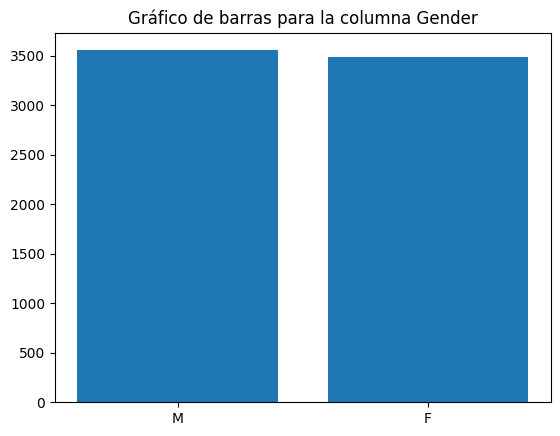

x = ['No' 'Yes']
y = [np.int64(5642), np.int64(1401)]


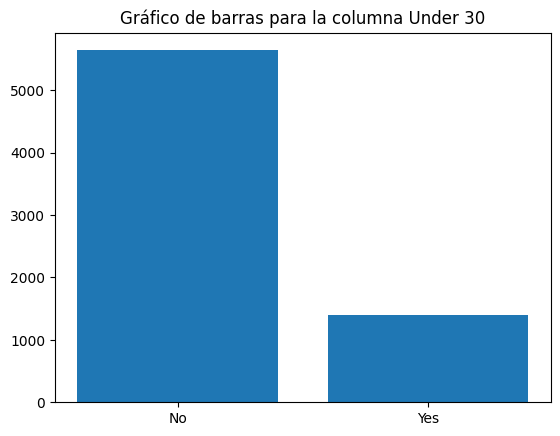

x = ['Yes' 'No']
y = [np.int64(1142), np.int64(5901)]


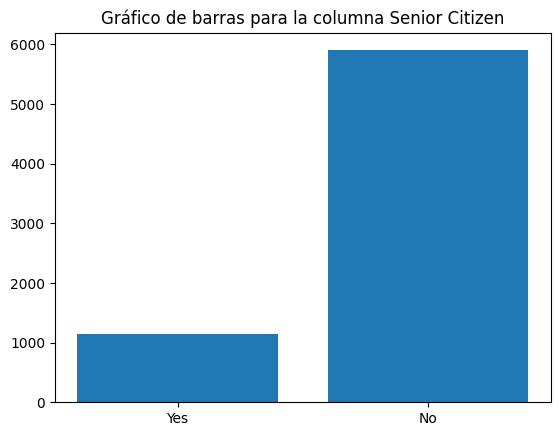

x = ['No' 'Yes']
y = [np.int64(3641), np.int64(3402)]


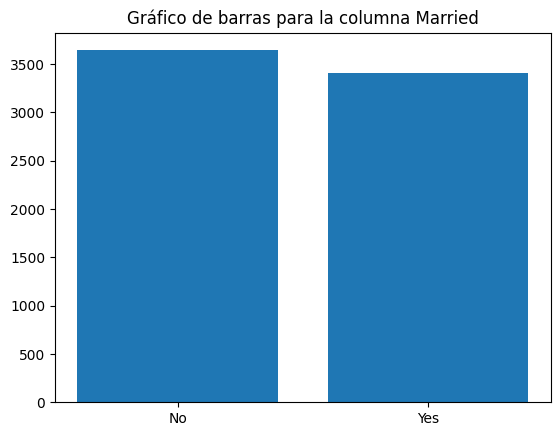

x = ['No' 'Yes']
y = [np.int64(5416), np.int64(1627)]


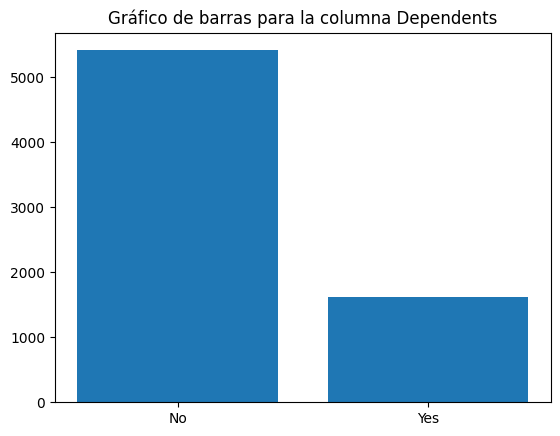

x = ['Los Angeles' 'Inglewood' 'Whittier' ... 'Tulelake' 'Jacumba' 'Holtville']
y = [np.int64(293), np.int64(25), np.int64(30), np.int64(5), np.int64(5), np.int64(5), np.int64(30), np.int64(20), np.int64(15), np.int64(10), np.int64(9), np.int64(5), np.int64(15), np.int64(5), np.int64(285), np.int64(4), np.int64(32), np.int64(12), np.int64(16), np.int64(8), np.int64(28), np.int64(8), np.int64(8), np.int64(28), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(38), np.int64(4), np.int64(4), np.int64(4), np.int64(61), np.int64(4), np.int64(104), np.int64(16), np.int64(4), np.int64(4), np.int64(16), np.int64(4), np.int64(8), np.int64(8), np.int64(4), np.int64(32), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(12), np.int64(112), np.int64(4), np.int64(4), np.int64(51), np.int64(17), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(8), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(8), np.int64(4), np.

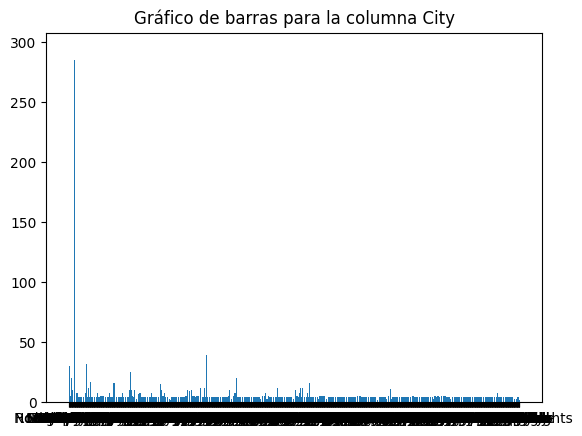

x = ['No' 'Yes']
y = [np.int64(3821), np.int64(3222)]


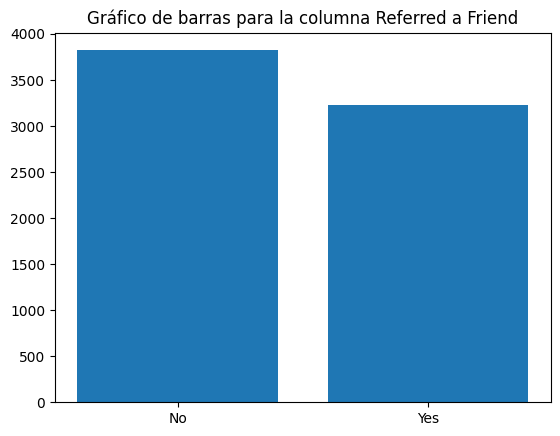

x = ['NO APPLY' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
y = [np.int64(3877), np.int64(805), np.int64(602), np.int64(415), np.int64(824), np.int64(520)]


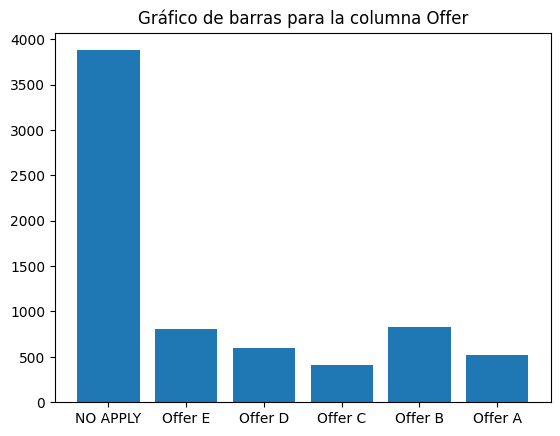

x = ['No' 'Yes']
y = [np.int64(682), np.int64(6361)]


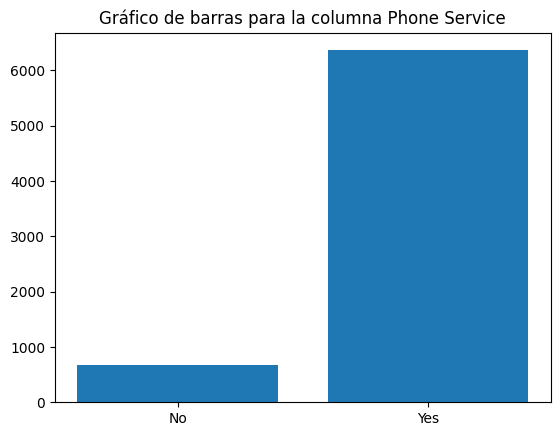

x = ['No' 'Yes']
y = [np.int64(4072), np.int64(2971)]


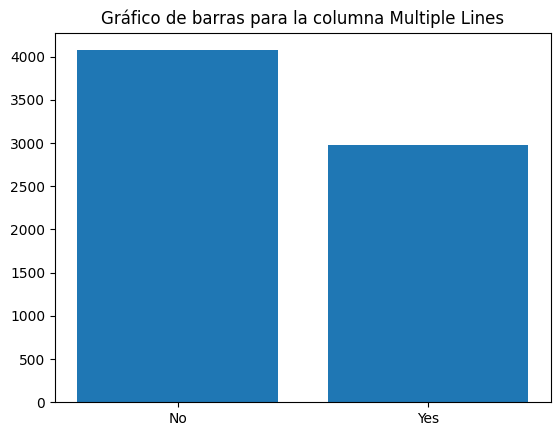

x = ['Yes' 'No']
y = [np.int64(5517), np.int64(1526)]


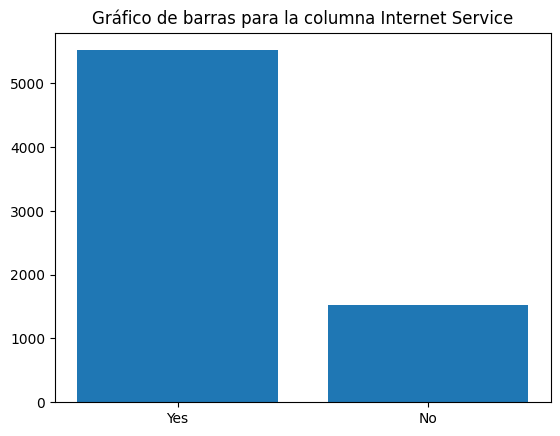

x = ['DSL' 'Fiber Optic' 'Cable' 'NO APPLY']
y = [np.int64(1652), np.int64(3035), np.int64(830), np.int64(1526)]


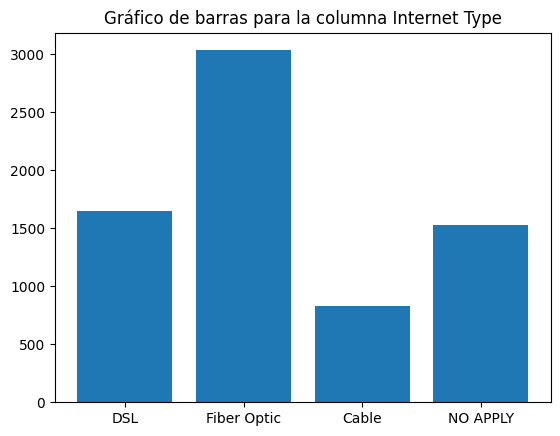

x = ['No' 'Yes']
y = [np.int64(5024), np.int64(2019)]


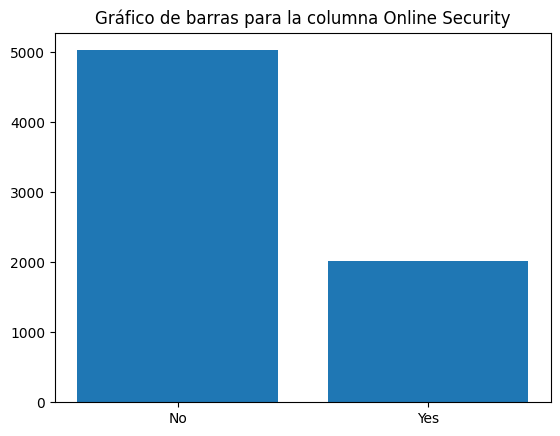

x = ['No' 'Yes']
y = [np.int64(4614), np.int64(2429)]


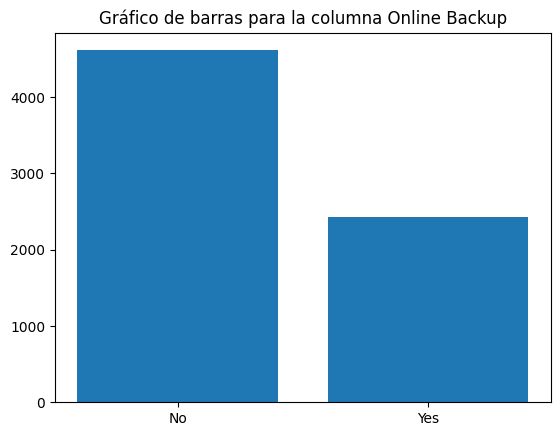

x = ['Yes' 'No']
y = [np.int64(2422), np.int64(4621)]


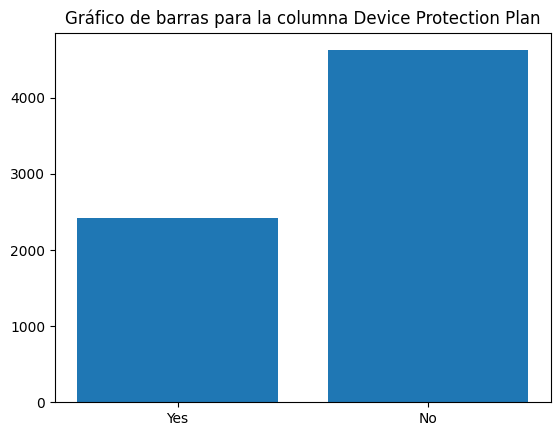

x = ['No' 'Yes']
y = [np.int64(4999), np.int64(2044)]


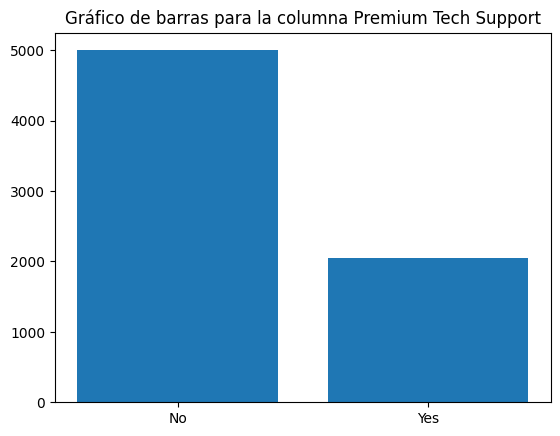

x = ['No' 'Yes']
y = [np.int64(4336), np.int64(2707)]


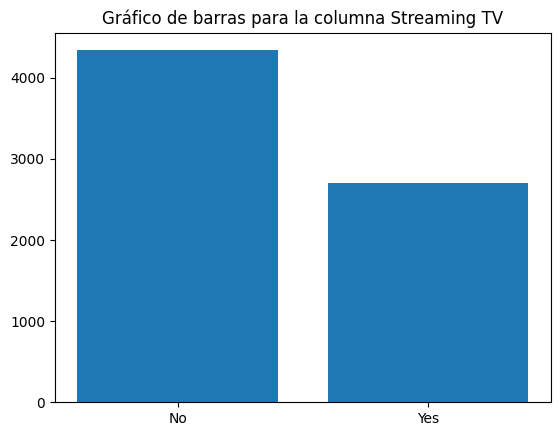

x = ['Yes' 'No']
y = [np.int64(2732), np.int64(4311)]


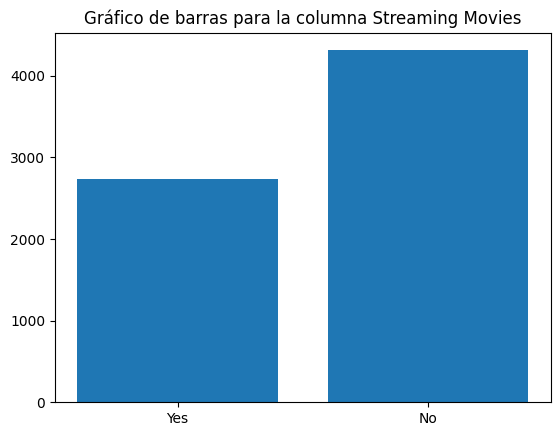

x = ['No' 'Yes']
y = [np.int64(4555), np.int64(2488)]


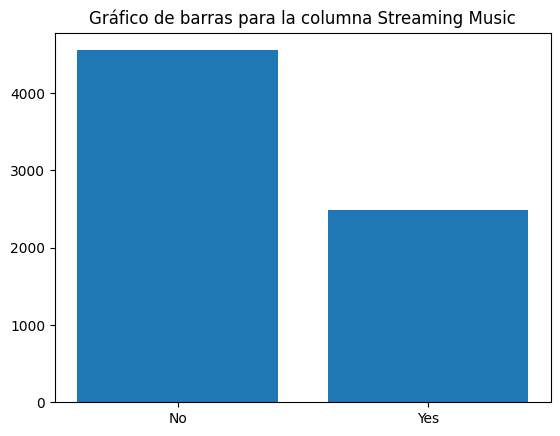

x = ['No' 'Yes']
y = [np.int64(2298), np.int64(4745)]


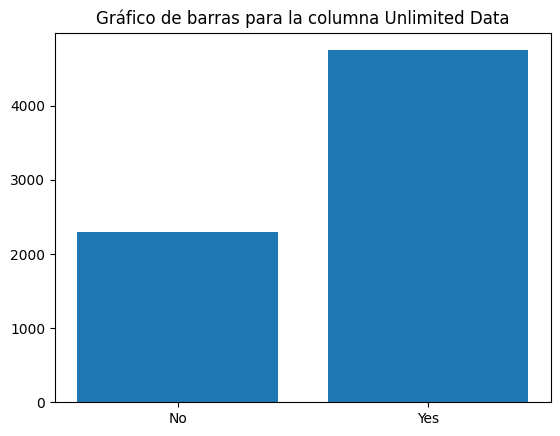

x = ['Month-to-Month' 'One Year' 'Two Year']
y = [np.int64(3610), np.int64(1550), np.int64(1883)]


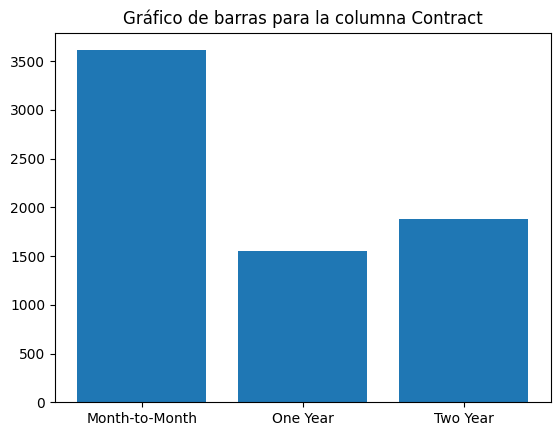

x = ['Yes' 'No']
y = [np.int64(4171), np.int64(2872)]


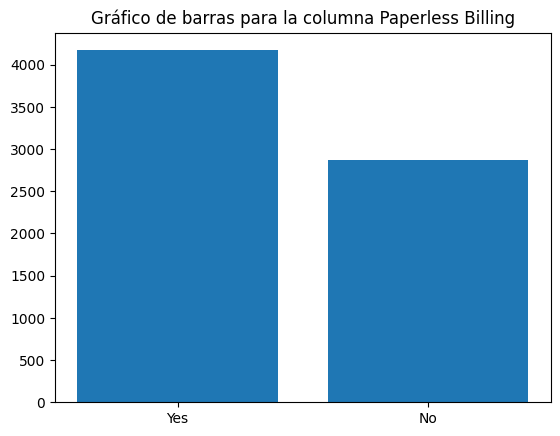

x = ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
y = [np.int64(3909), np.int64(2749), np.int64(385)]


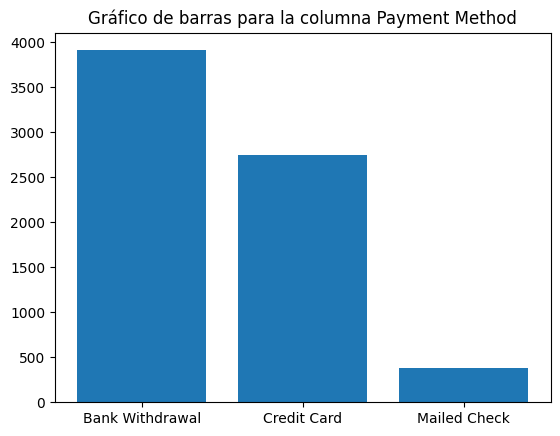

x = ['Churned' 'Stayed' 'Joined']
y = [np.int64(1869), np.int64(4720), np.int64(454)]


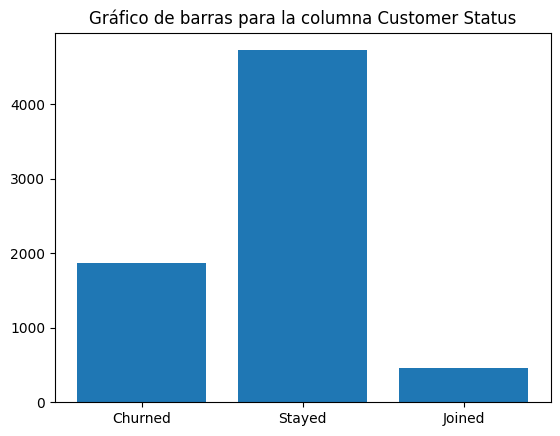

x = ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' 'NO APPLY']
y = [np.int64(841), np.int64(303), np.int64(211), np.int64(200), np.int64(314), np.int64(5174)]


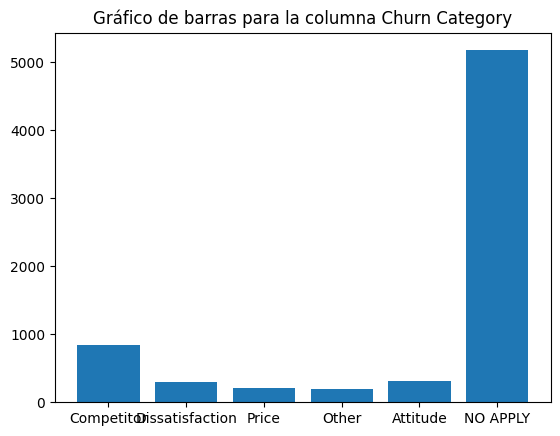

x = ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' 'NO APPLY' 'Lack of self-service on Website']
y = [np.int64(117), np.int64(311), np.int64(37), np.int64(39), np.int64(313), np.int64(130), np.int64(63), np.int64(30), np.int64(77), np.int64(64), np.int64(31), np.int64(220), np.int64(72), np.int64(100), np.int64(46), np.int64(78), np.int64(94), np.int64(12), np.int64(6), np.int64(5174), np.int64(29)]


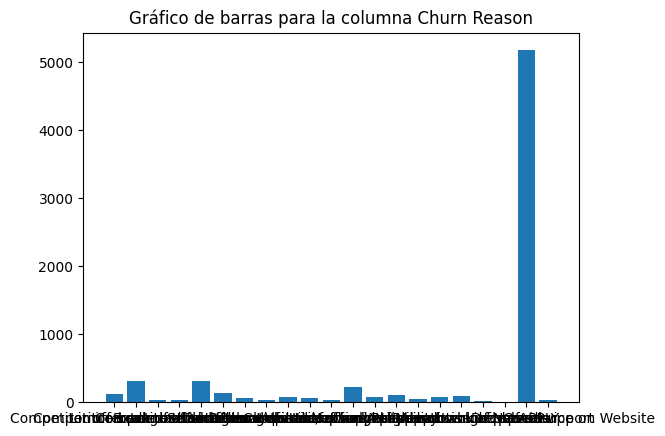

In [79]:
for columna in users.columns:
    y = list()
    if users[columna].dtype in ["object"]:
        if columna != "Customer ID":
            # print(f"Valores únicos en la columna {columna}:")
            # print(users[columna].unique())
            x=(users[columna].unique())
            for unico in x:
                y.append(users[columna].value_counts()[unico])
            print(f"x = {x}")
            print(f"y = {y}")
            fig, ax = plt.subplots()
            ax.bar(x, y)
            ax.set_title(f'Gráfico de barras para la columna {columna}')
            plt.show()


---
---
---


8. ESTUDIO NUMERICAS


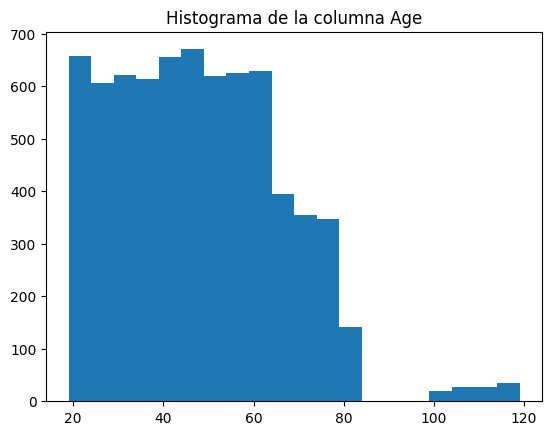

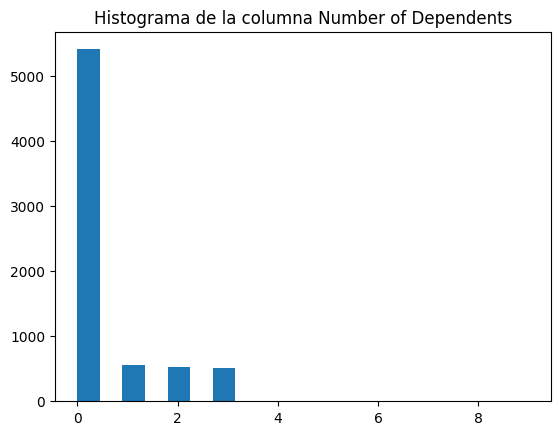

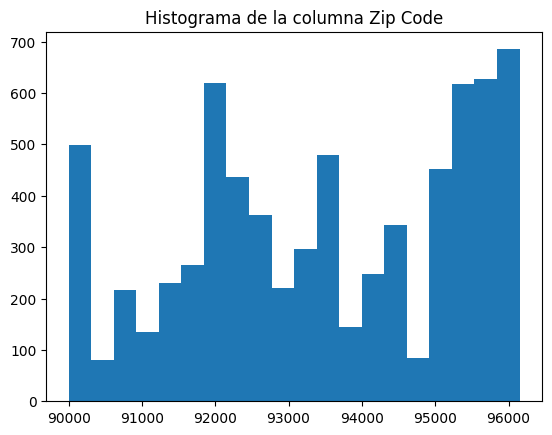

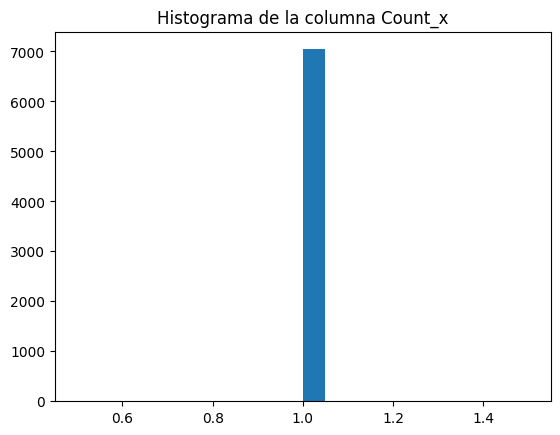

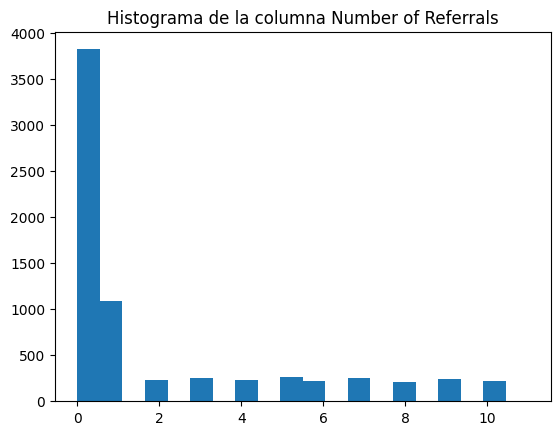

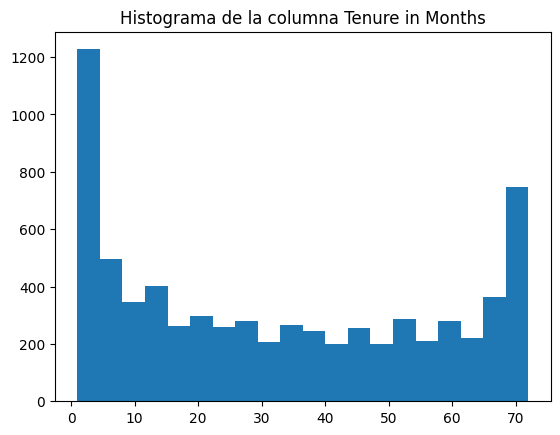

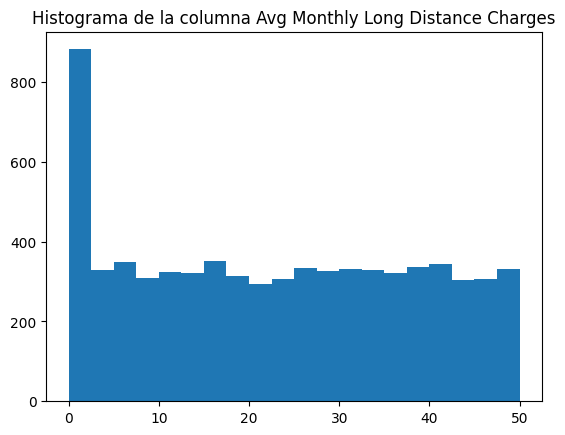

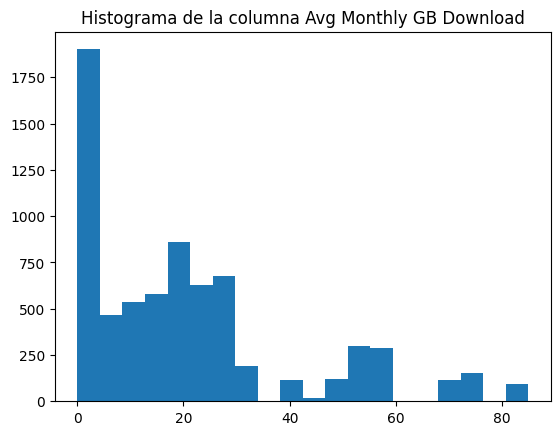

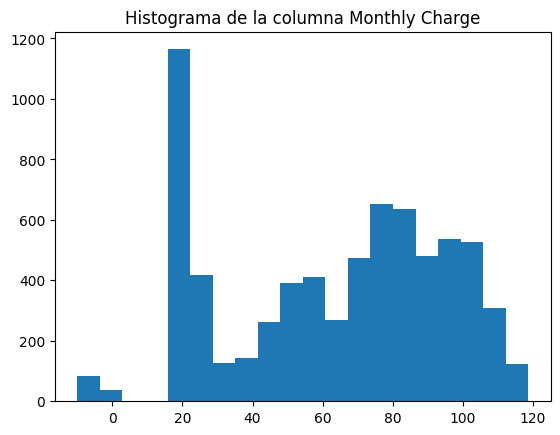

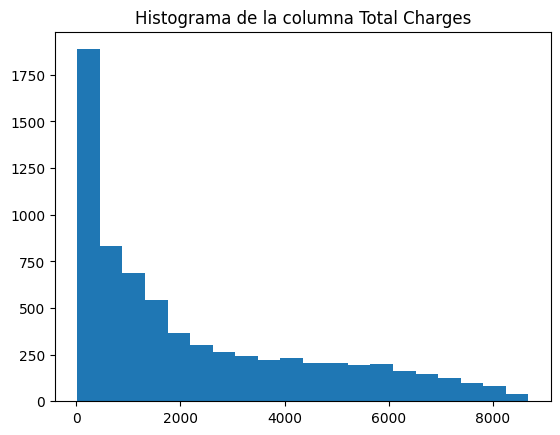

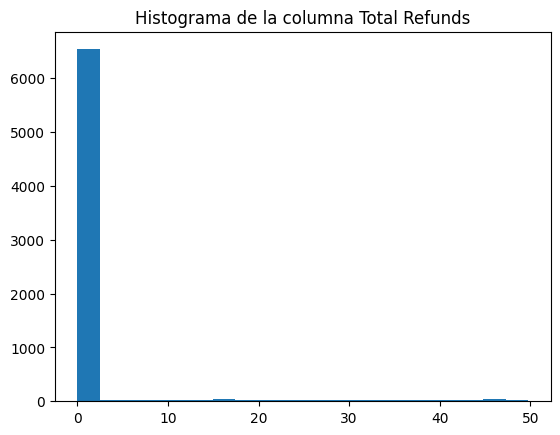

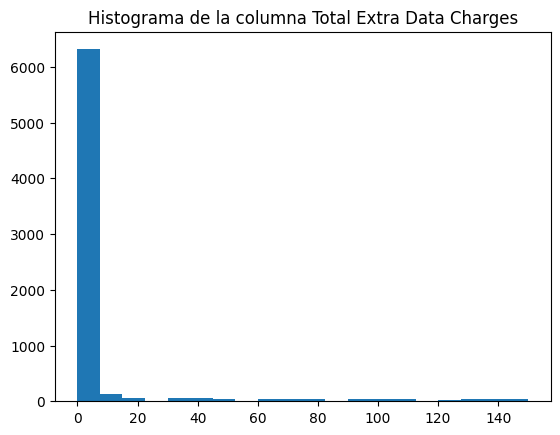

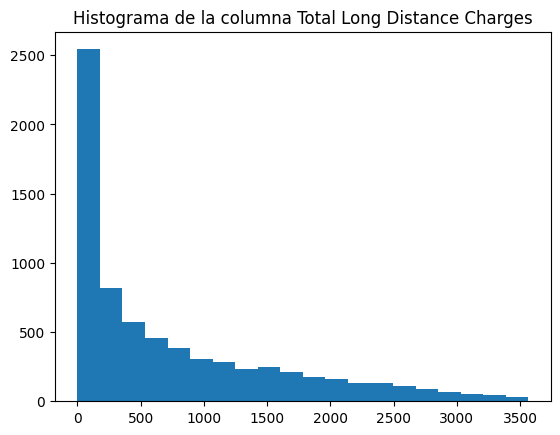

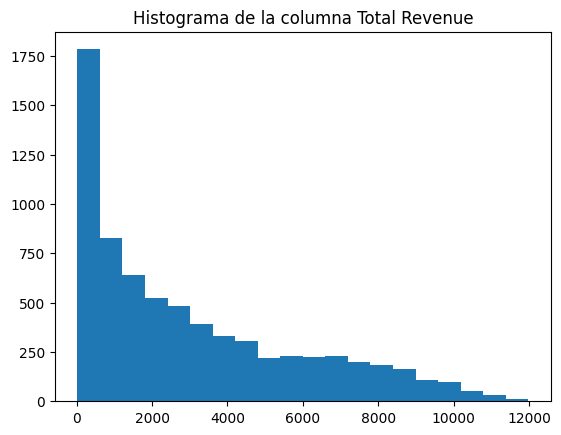

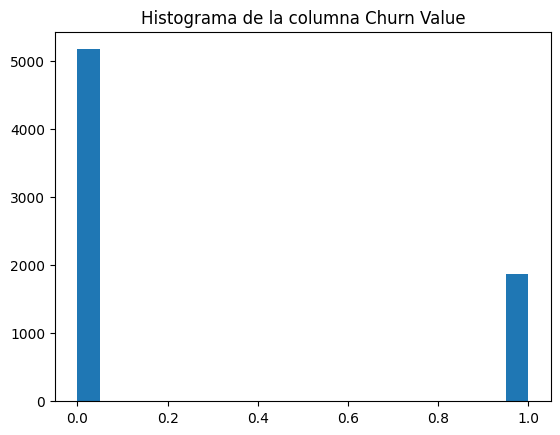

In [80]:
for columna in users.columns:
    if users[columna].dtype in ['int64', 'float64']:
        fig, ax = plt.subplots()
        ax.hist(users[columna], bins=20)
        ax.set_title(f'Histograma de la columna {columna}')
        plt.show()

---
---
---


9. ANALISIS UNIVARIADO
NOS VALE TAMBIEN PARA HACER ESTUDIO DESCRIPTIVO


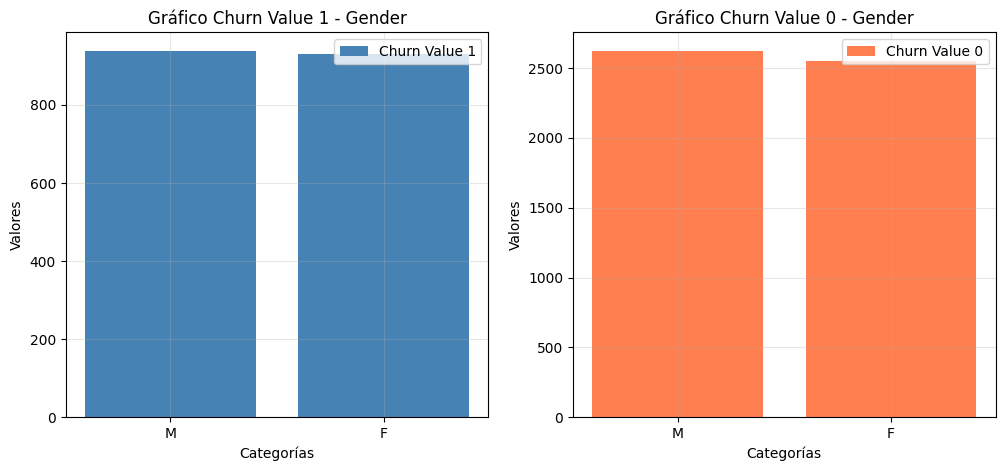

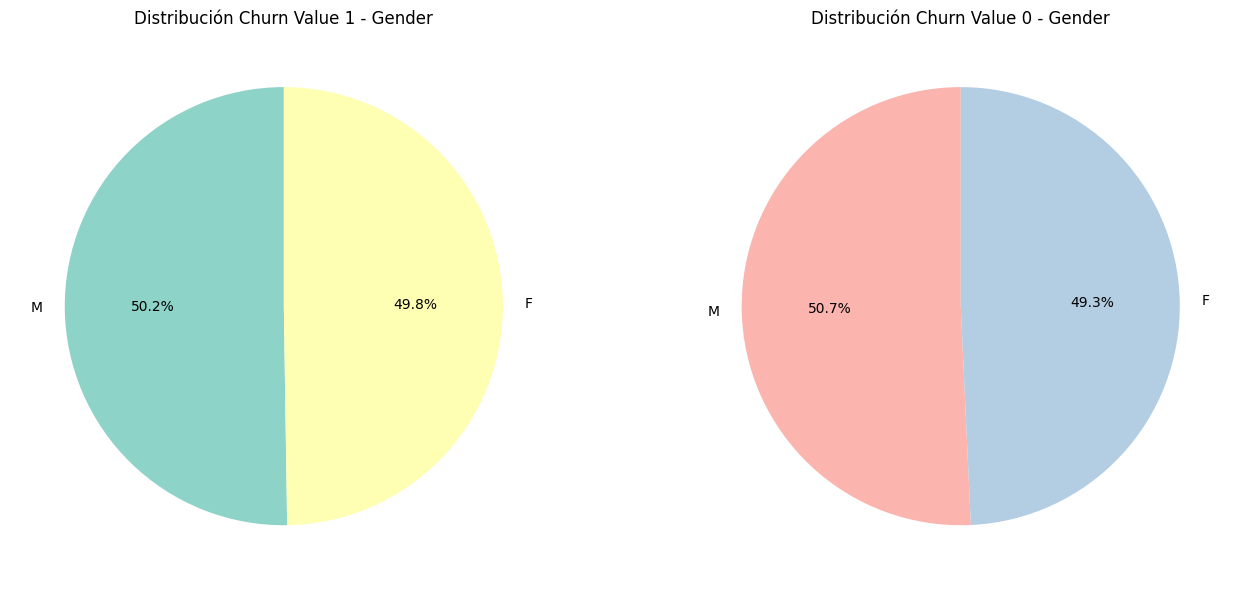

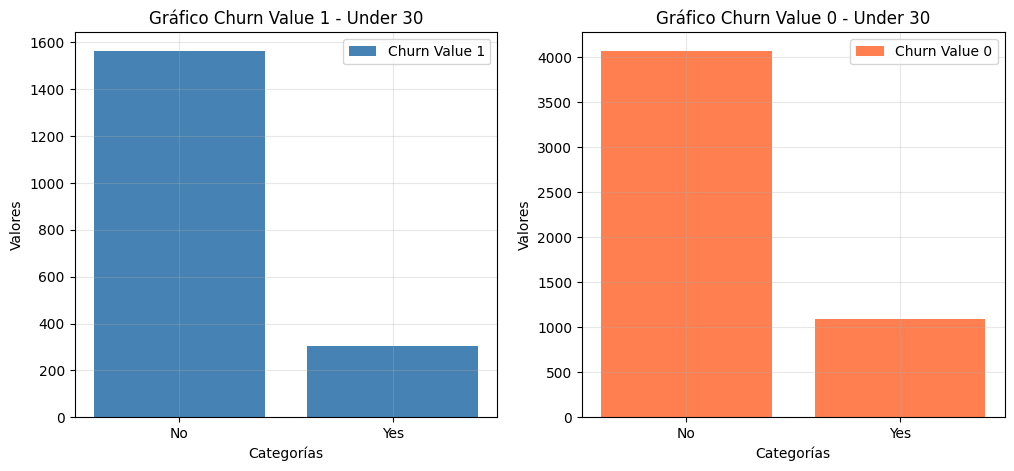

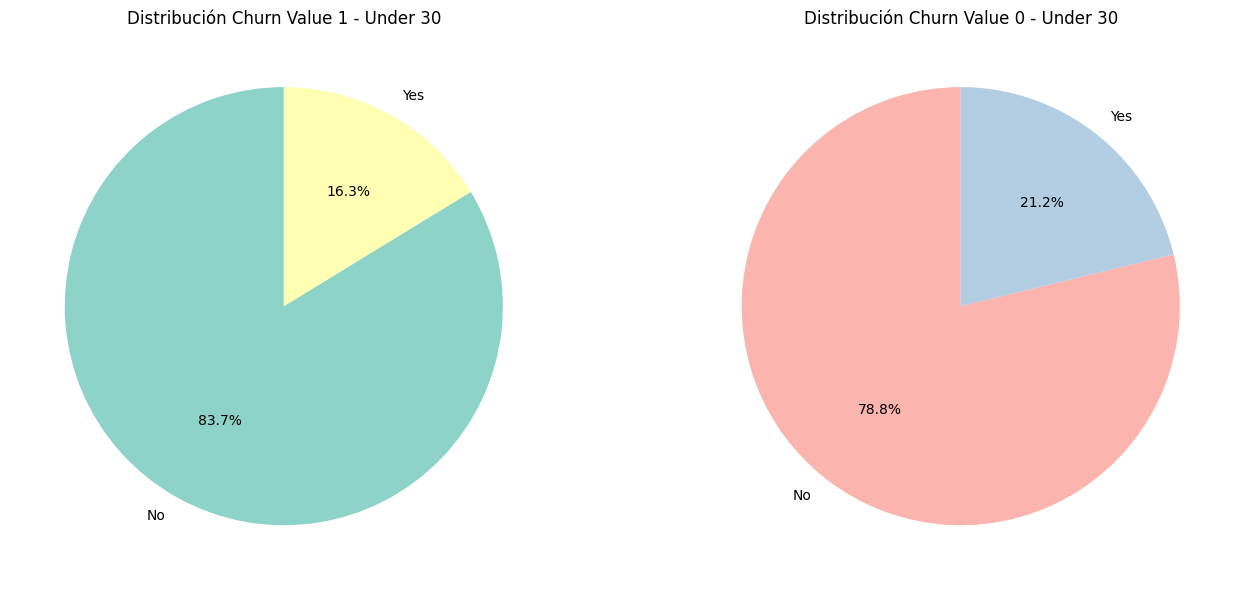

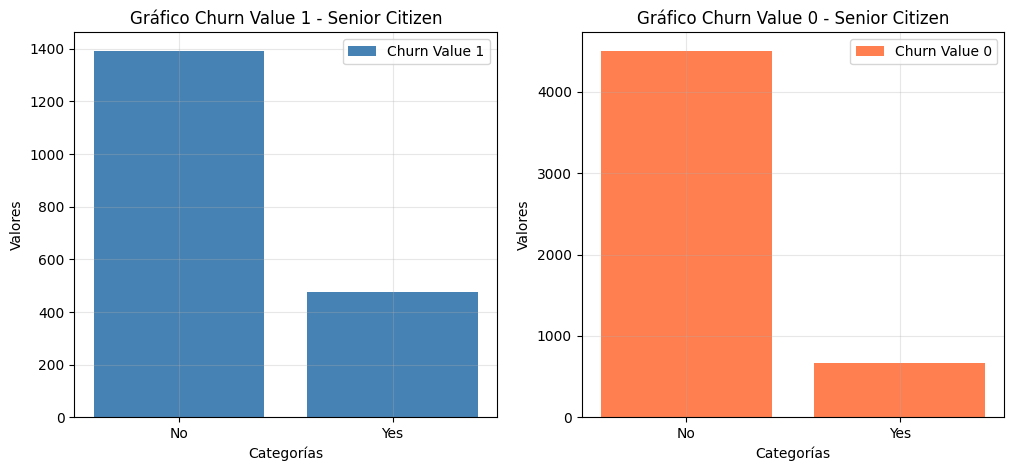

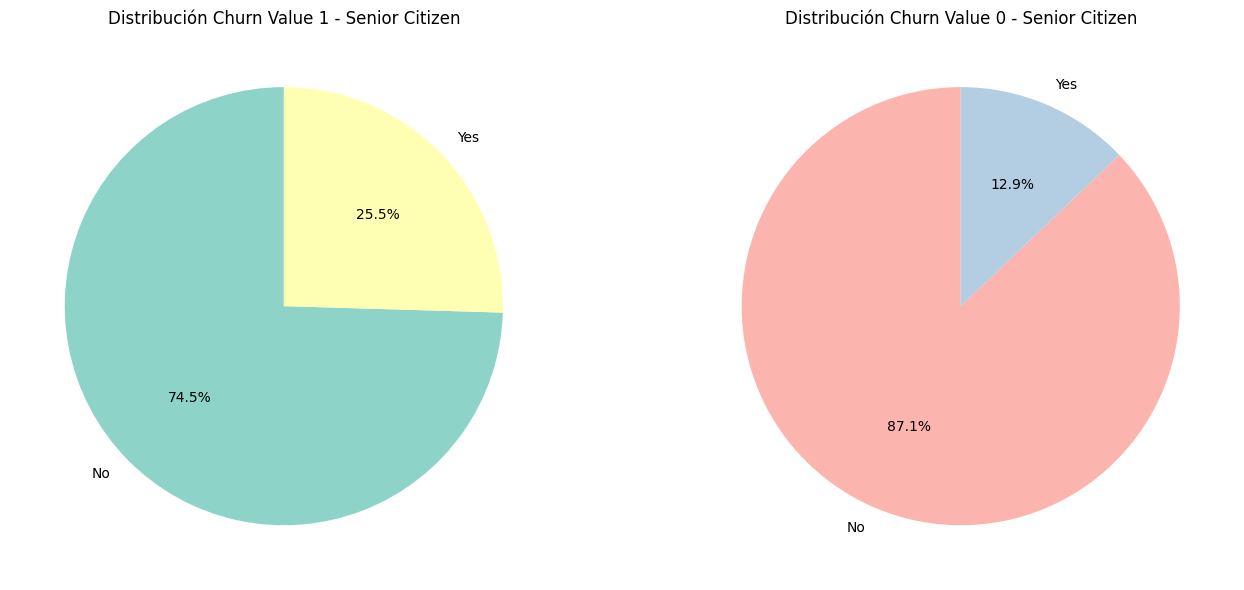

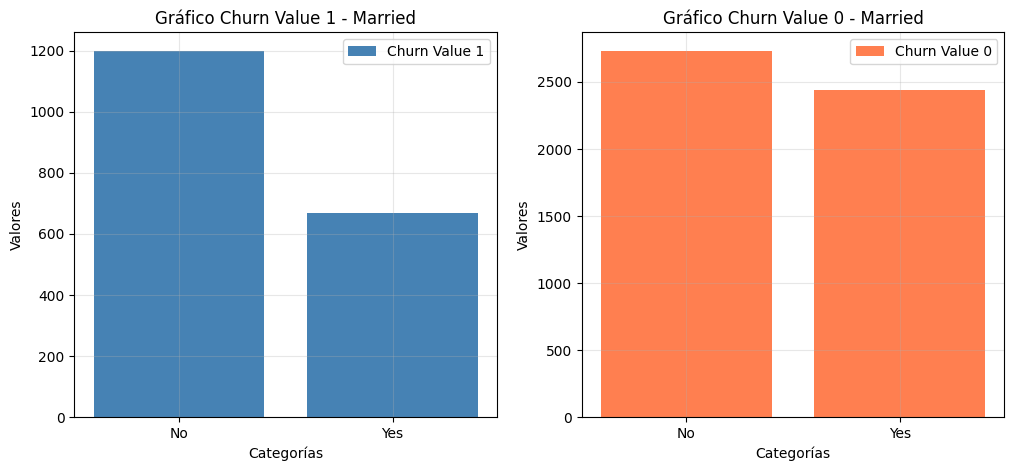

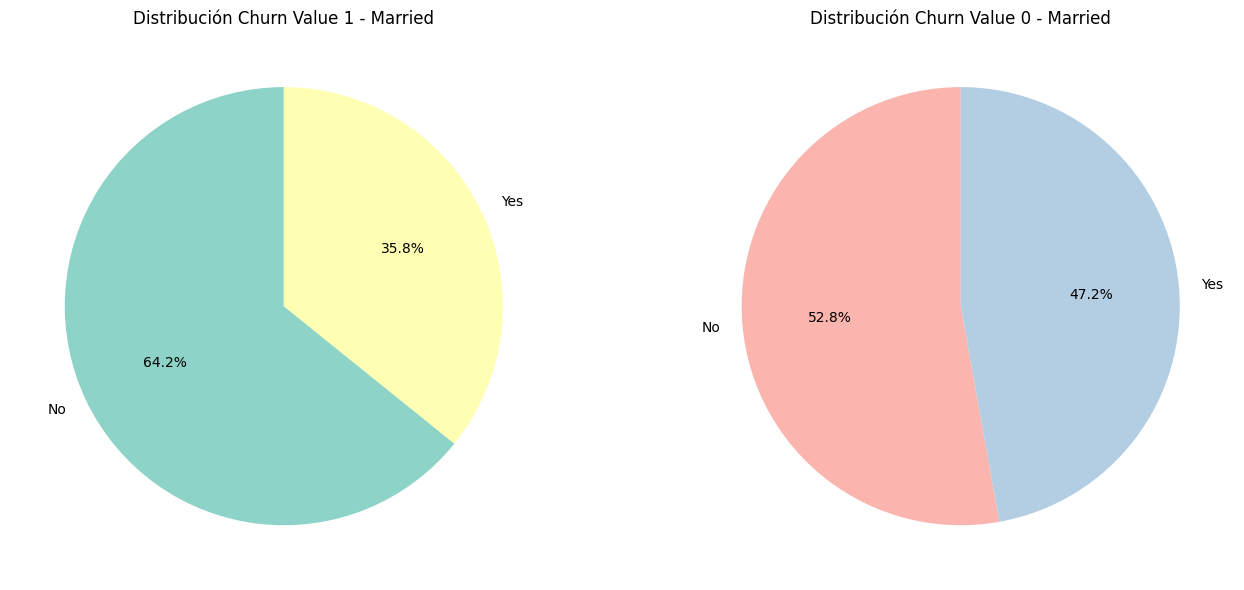

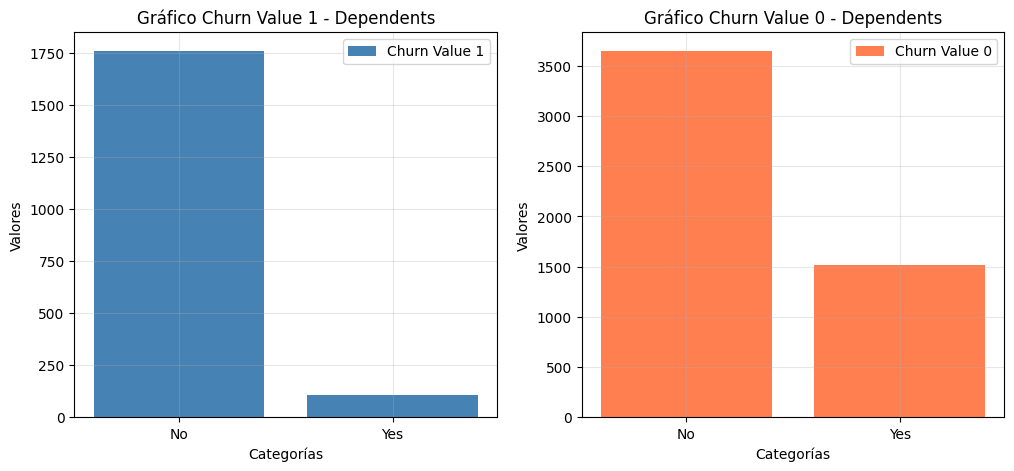

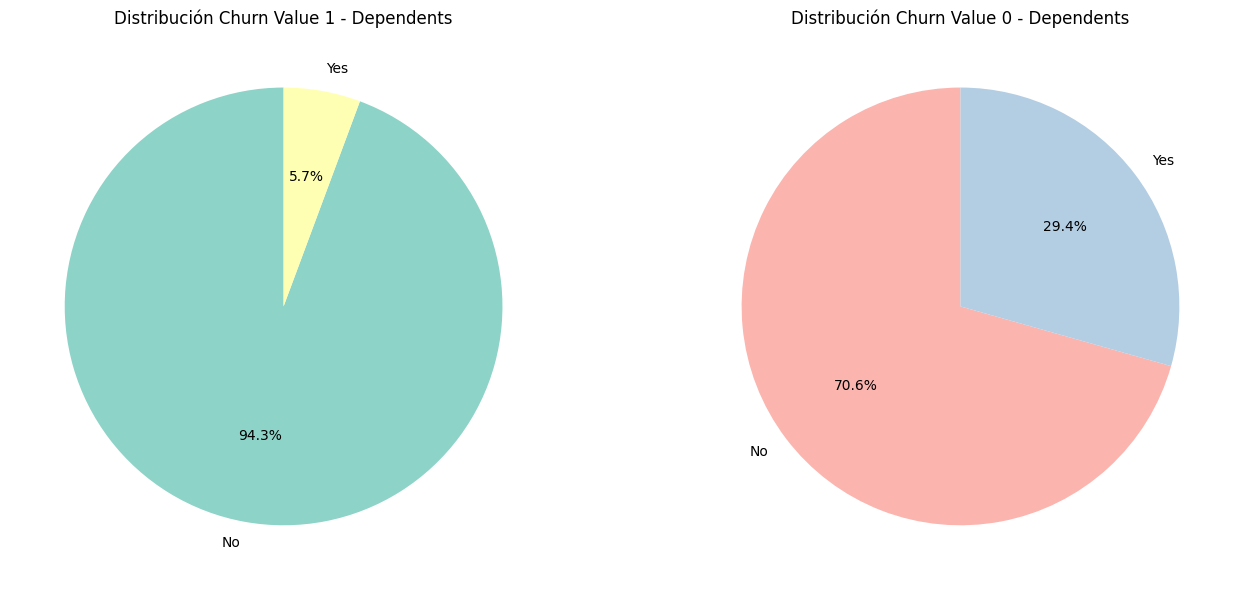

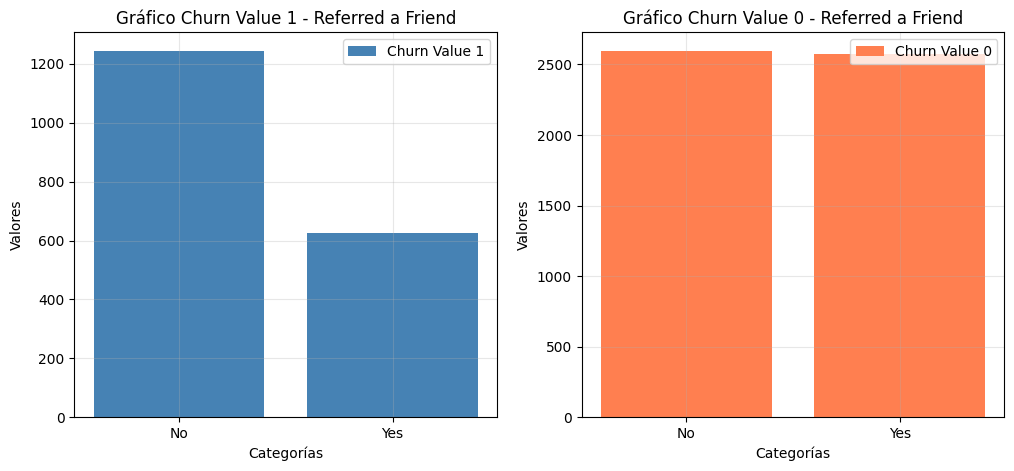

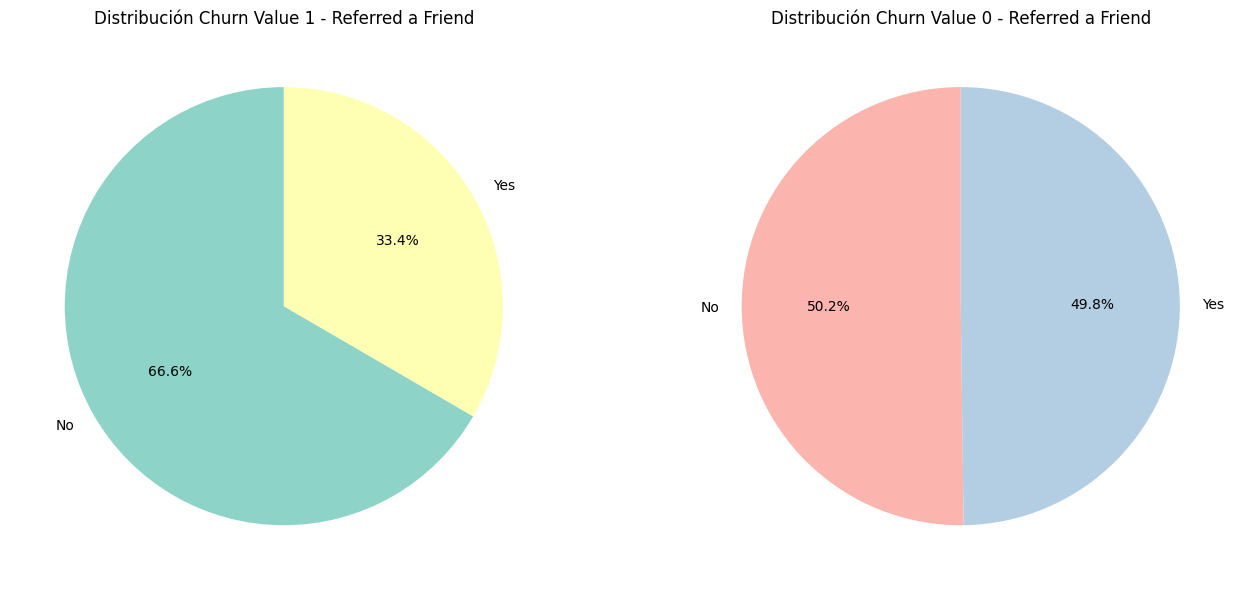

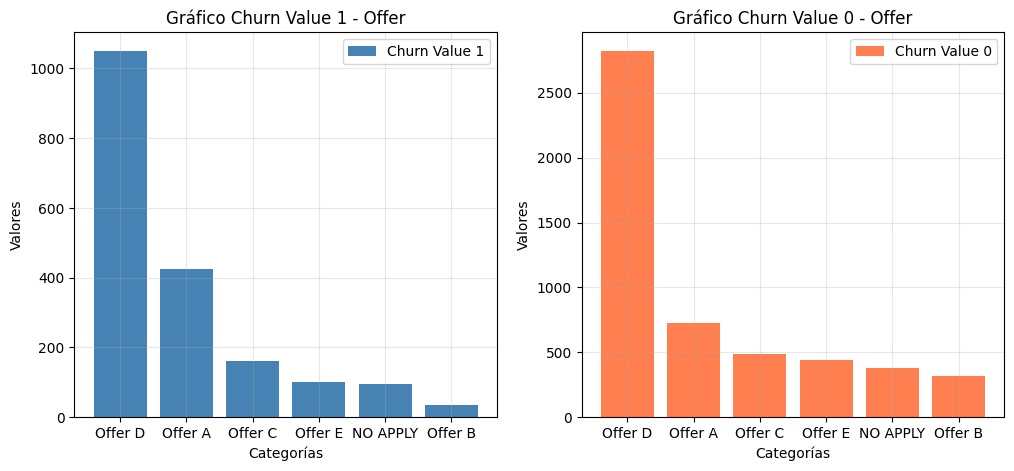

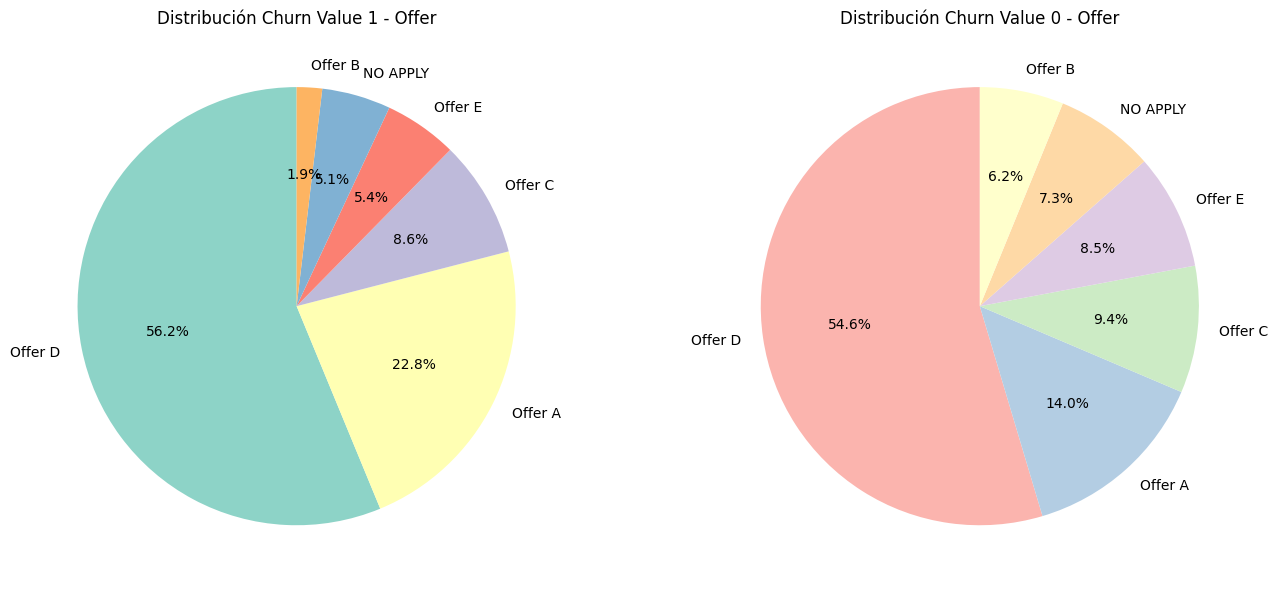

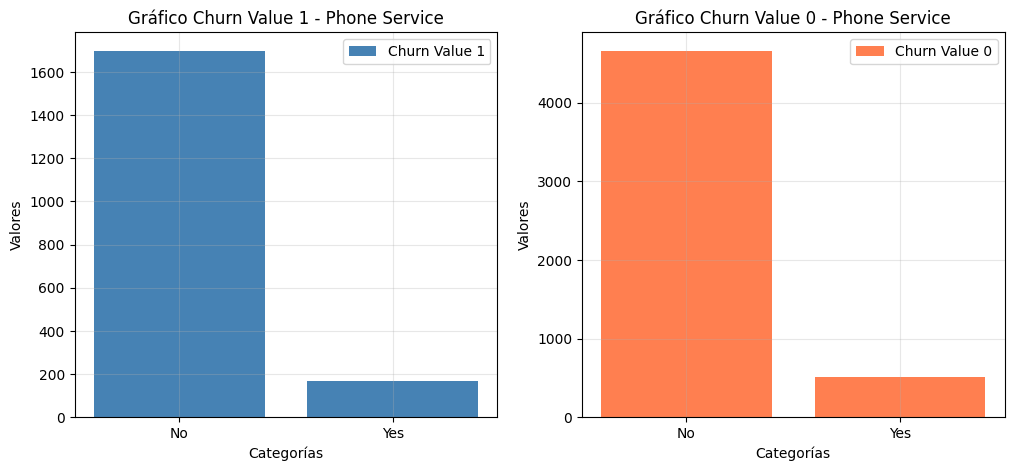

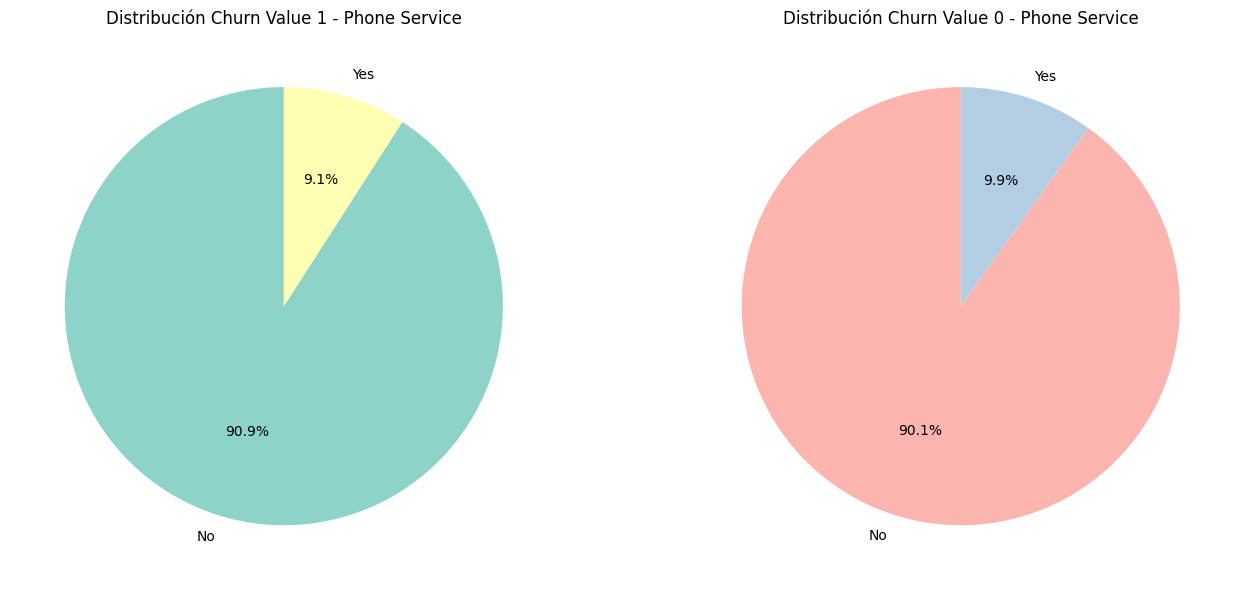

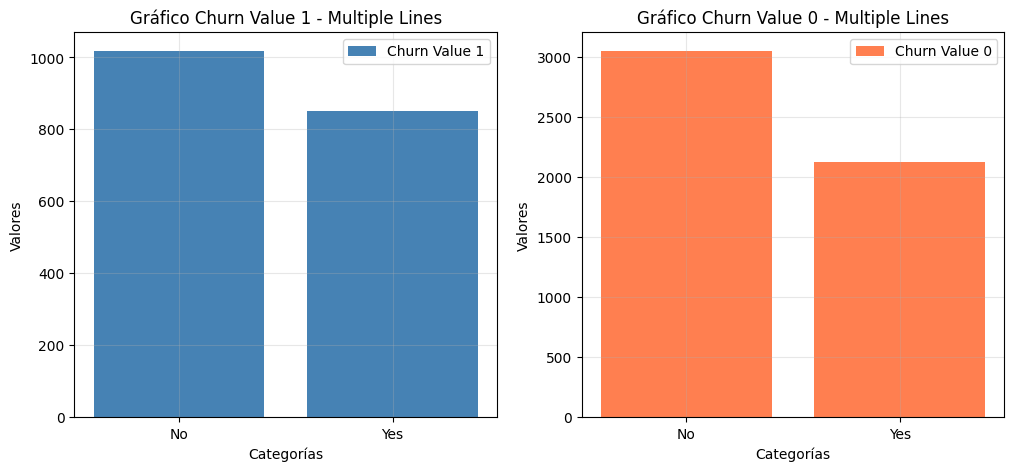

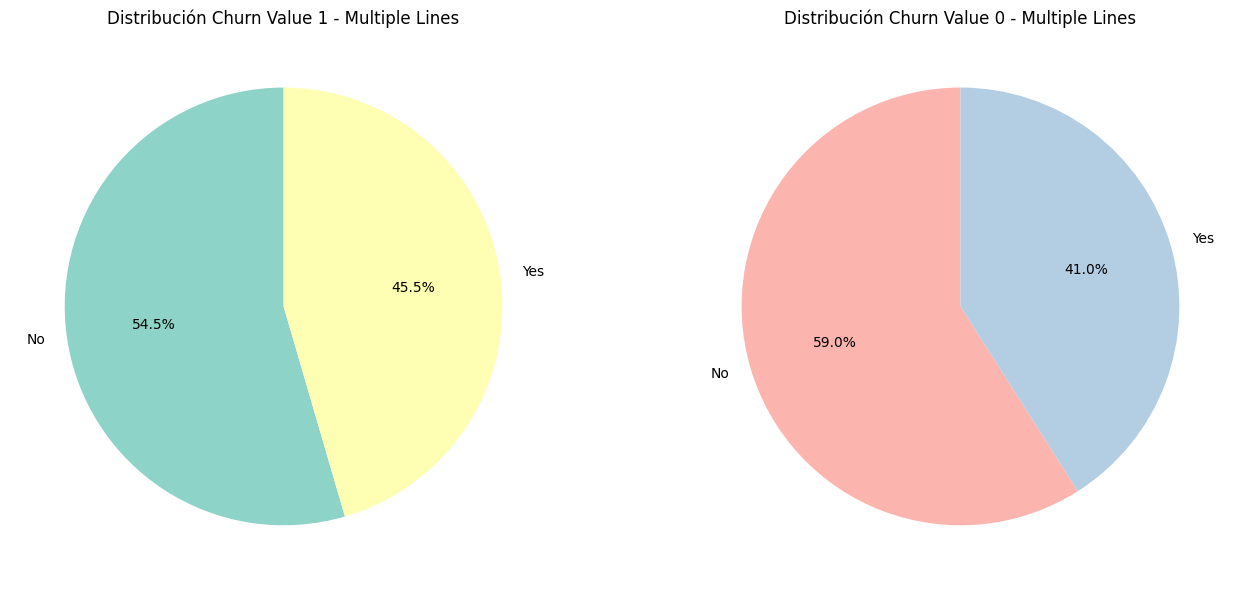

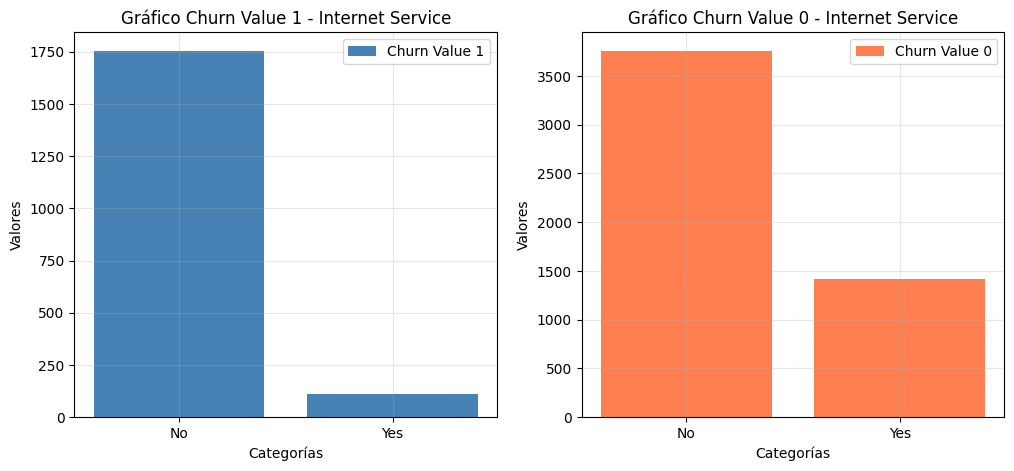

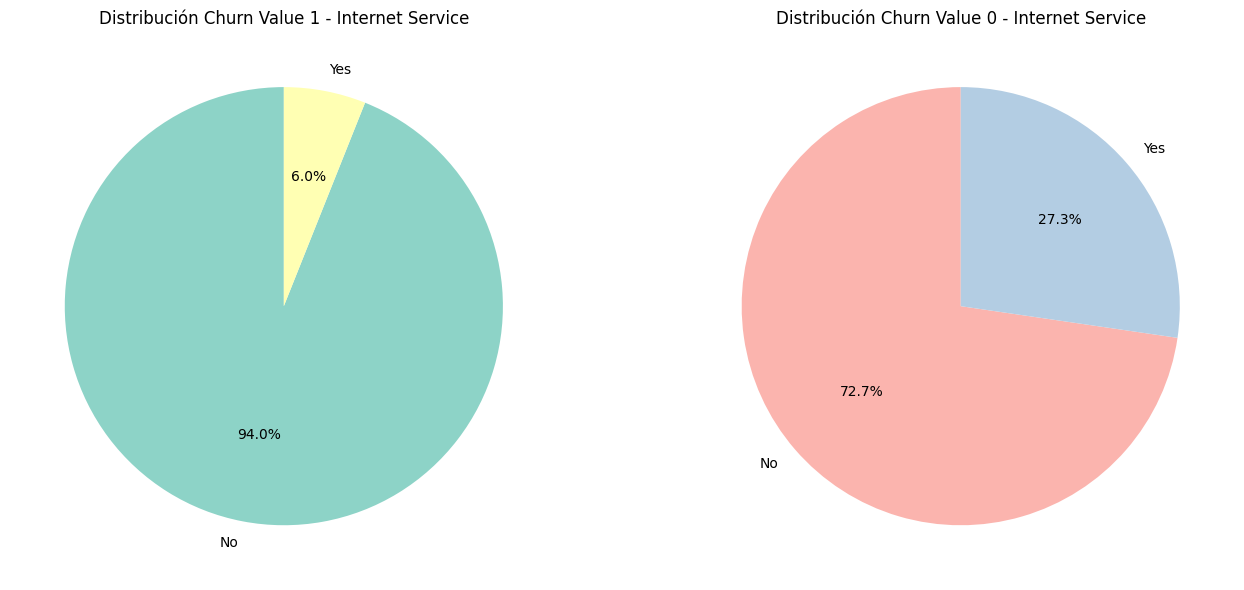

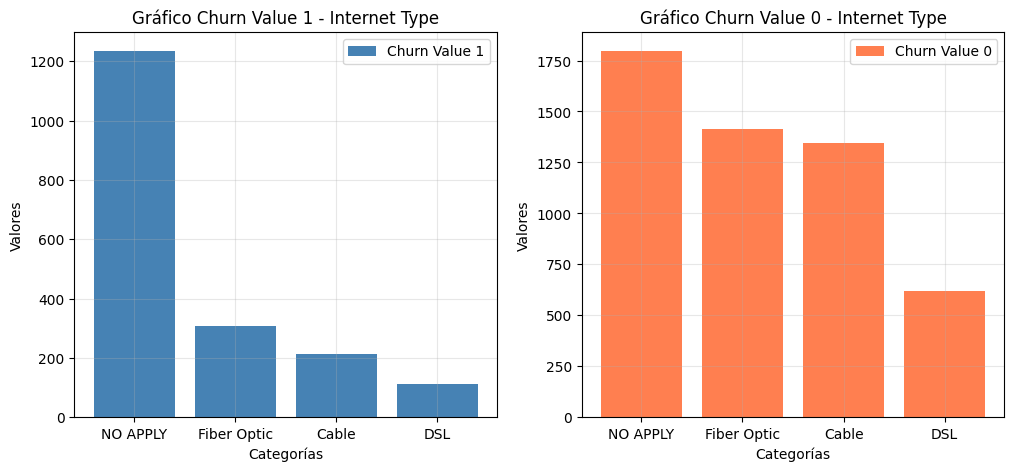

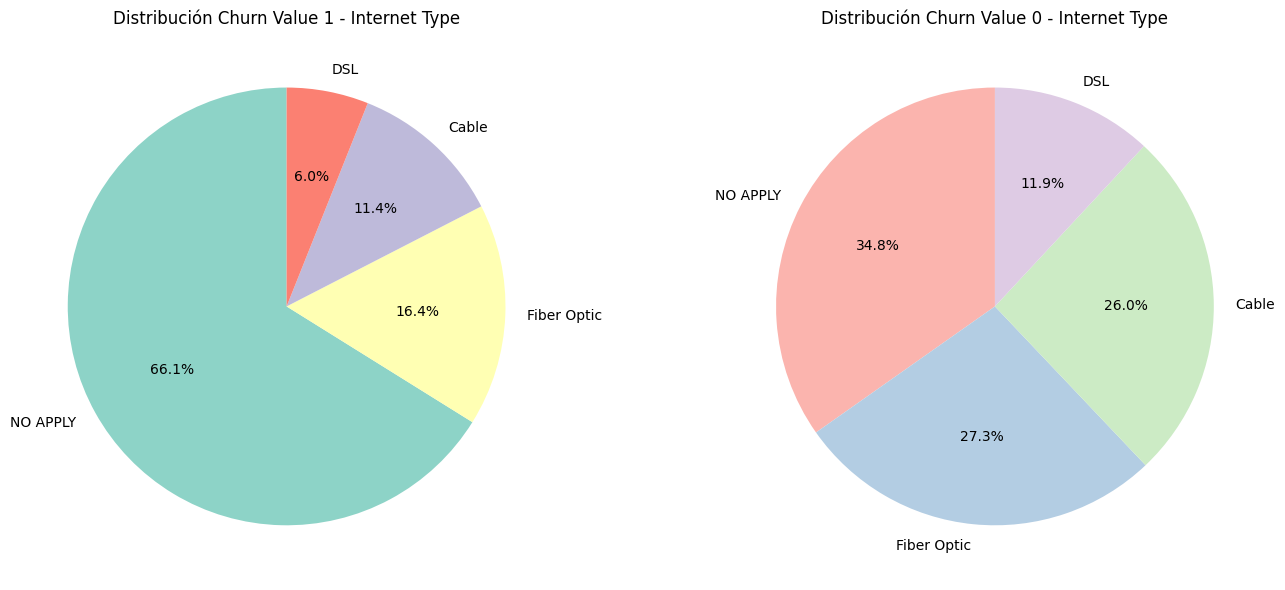

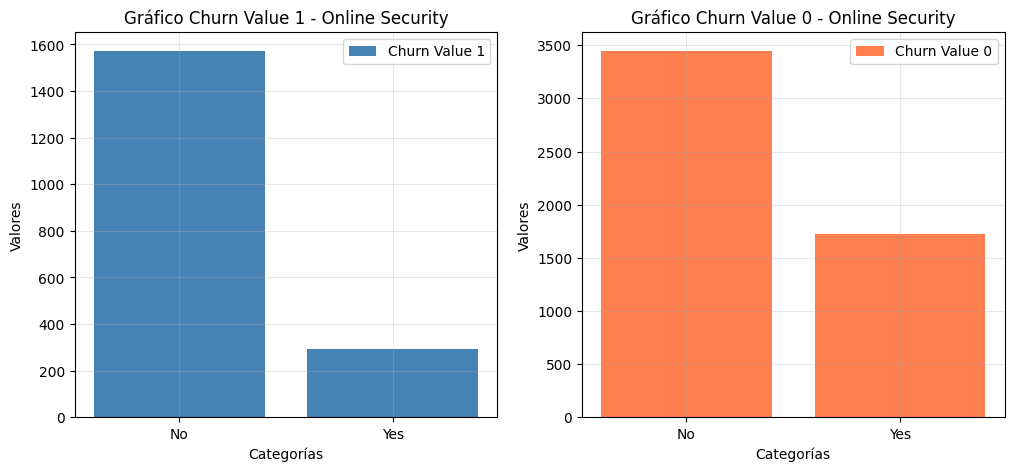

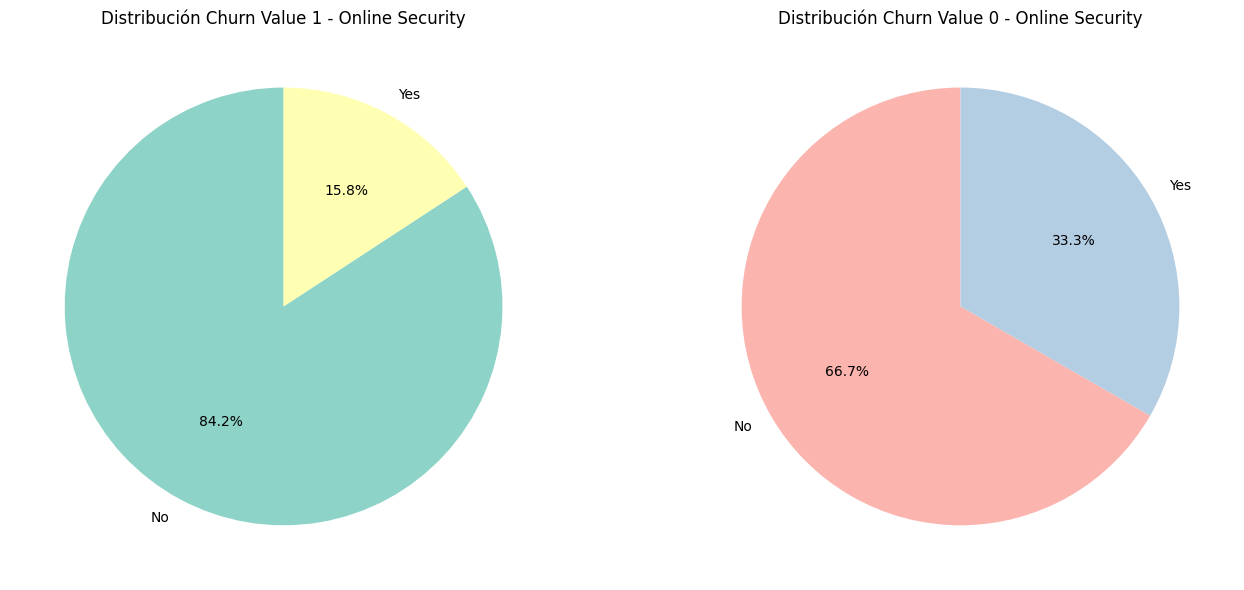

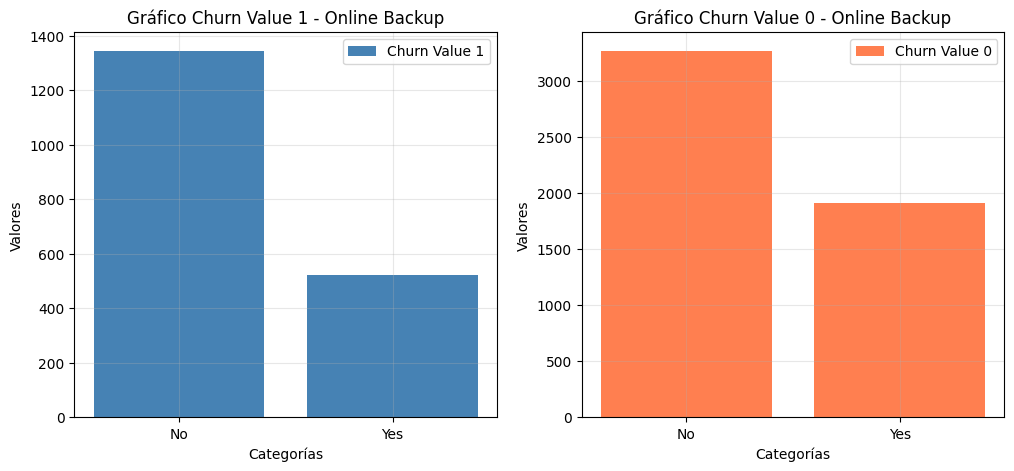

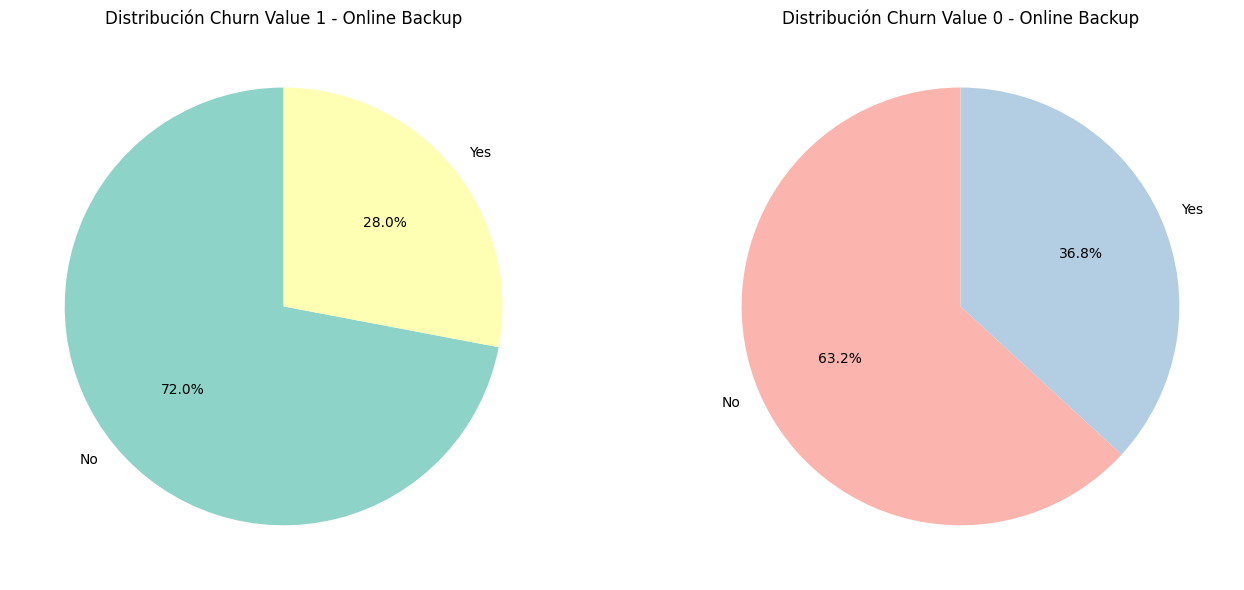

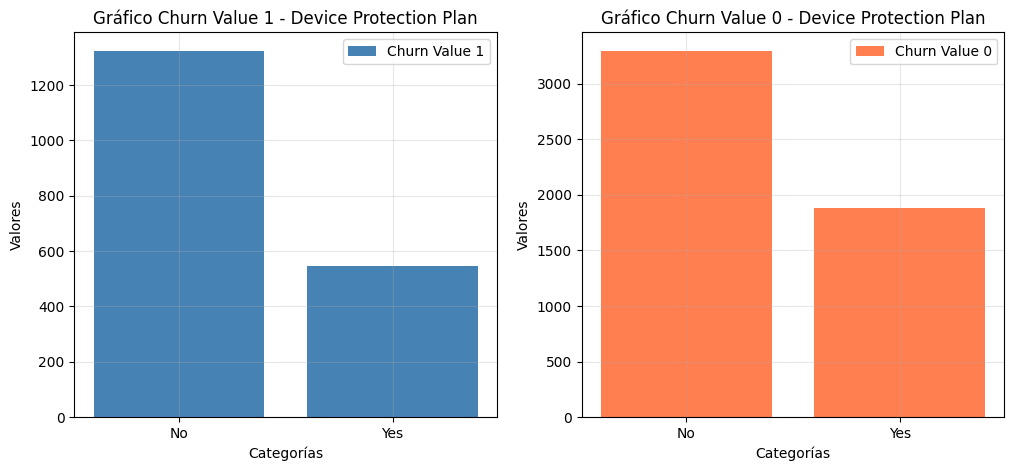

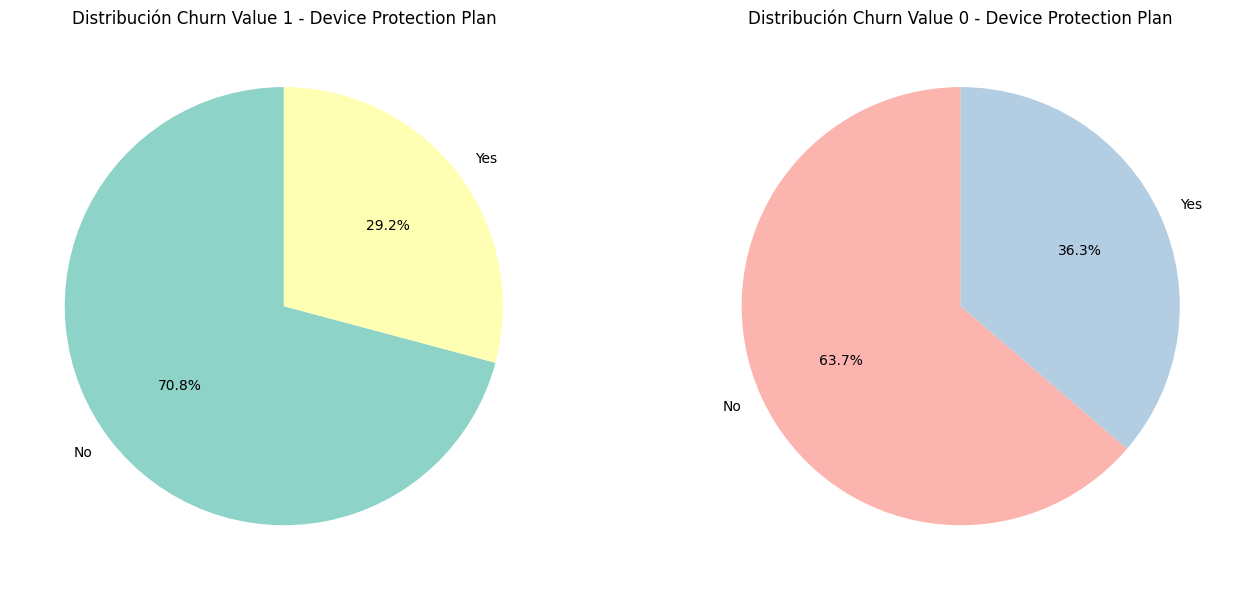

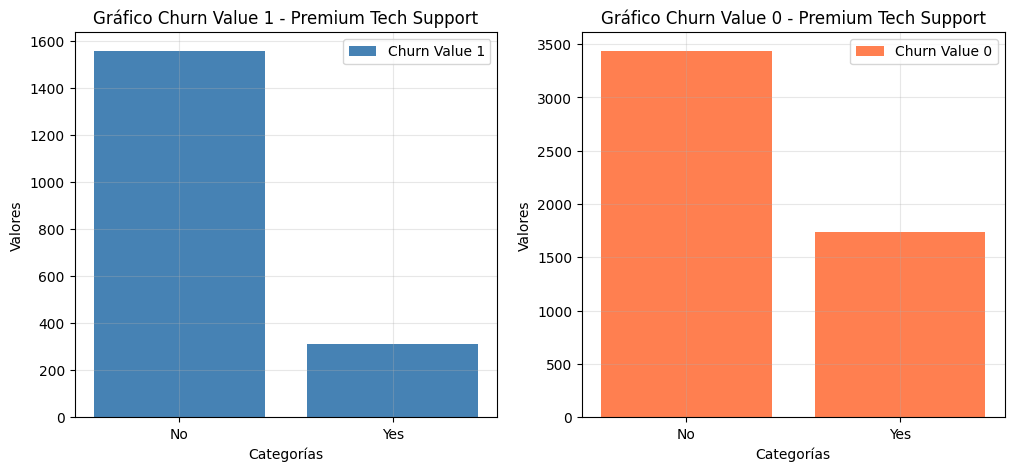

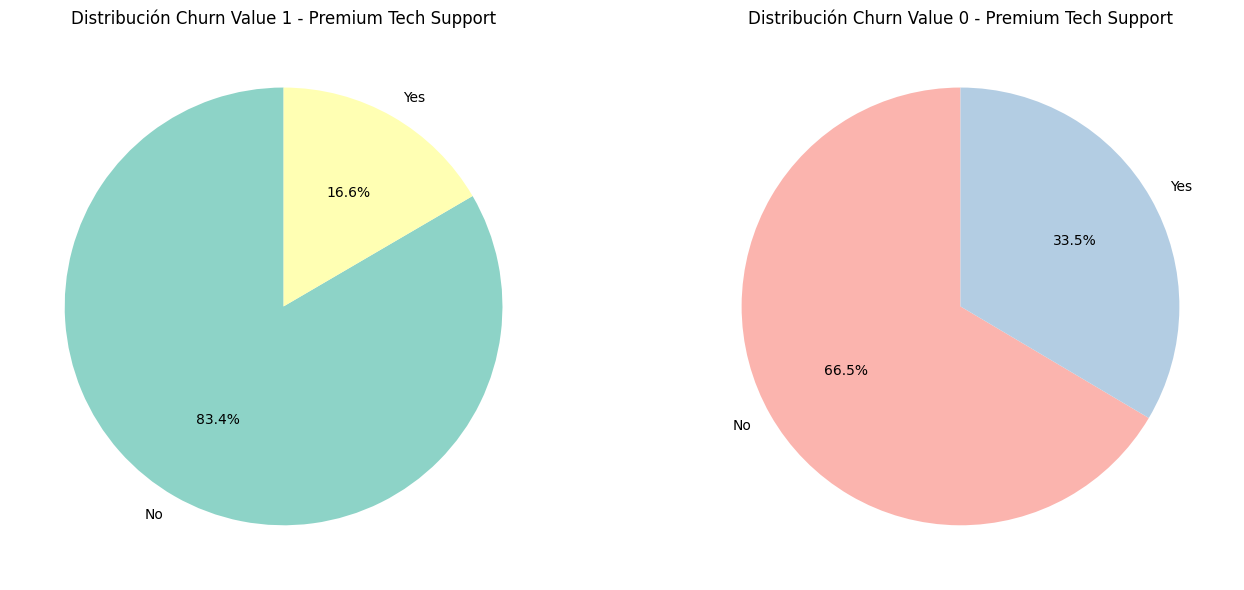

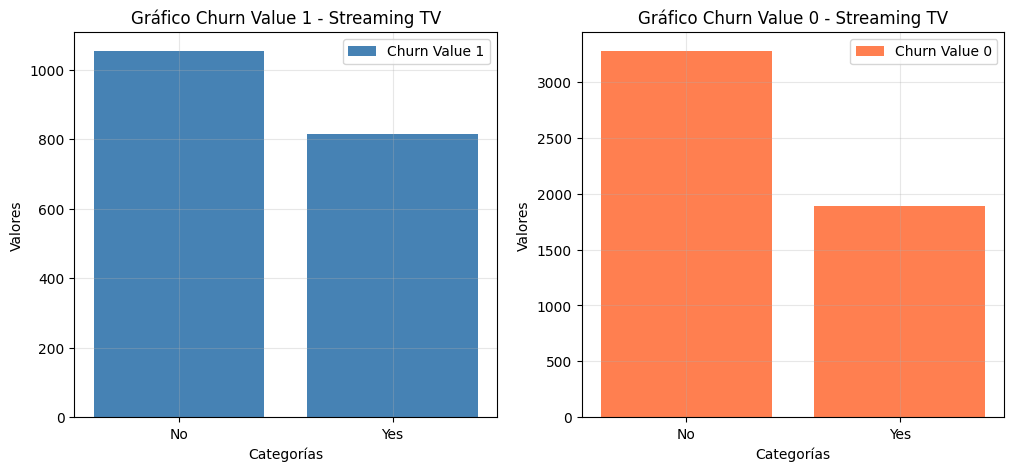

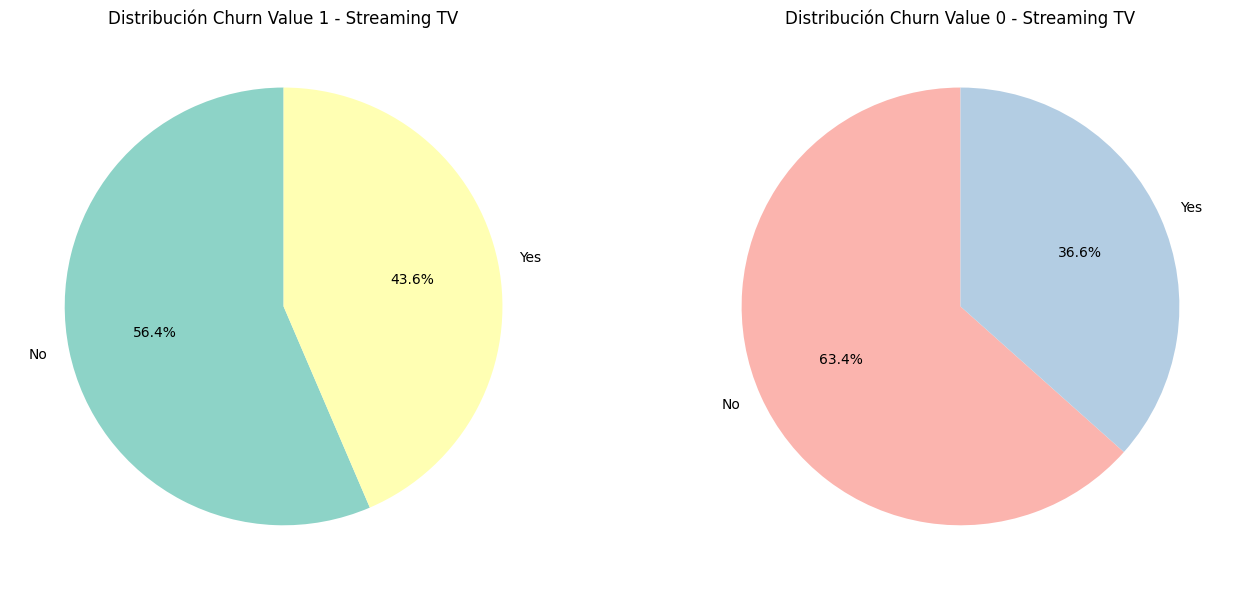

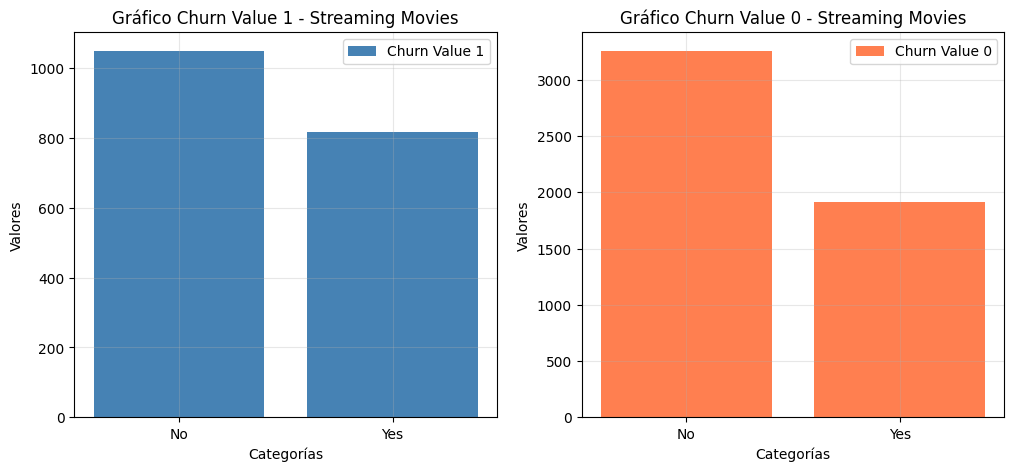

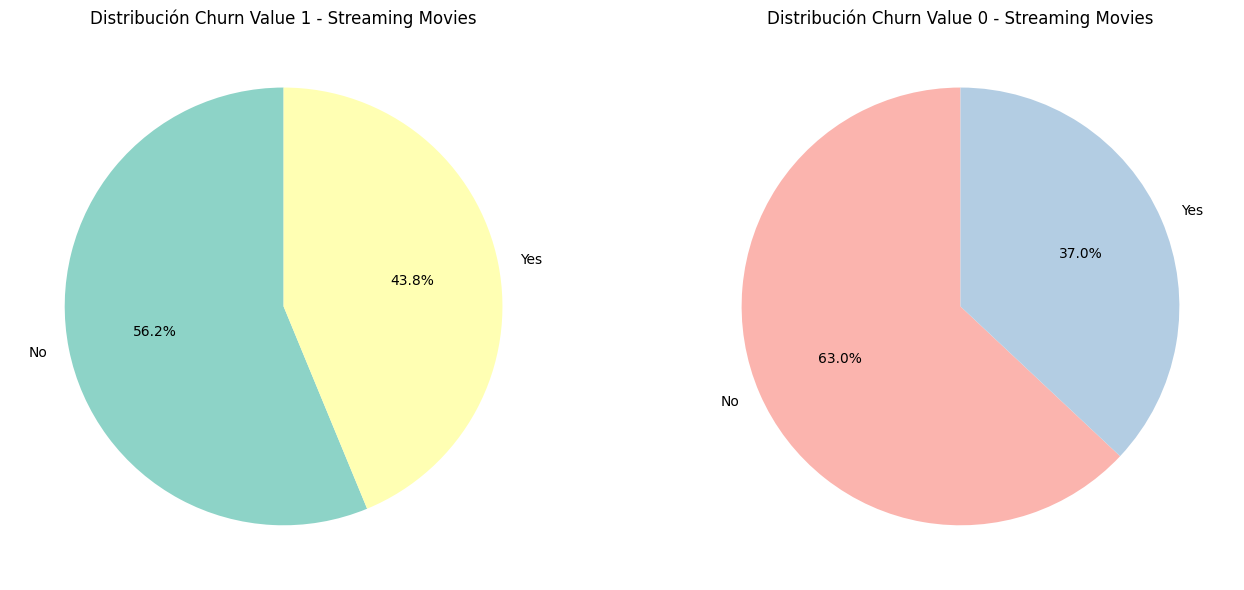

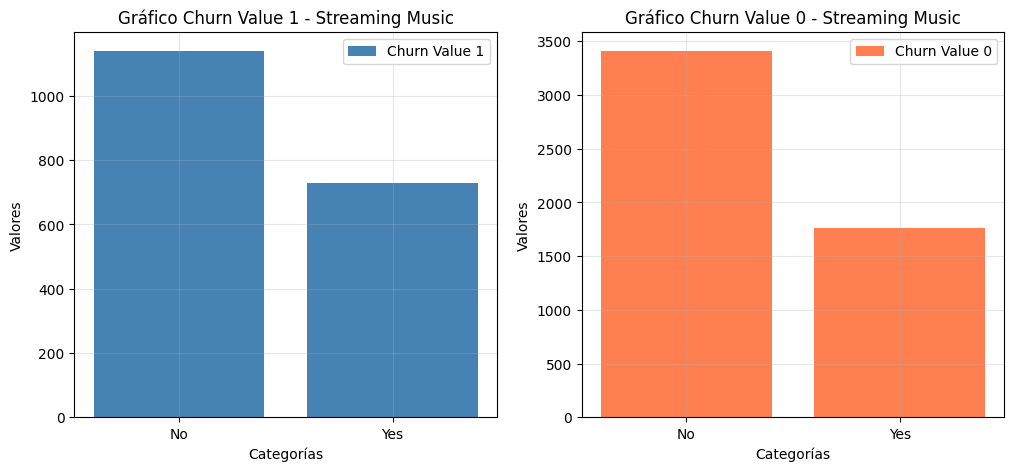

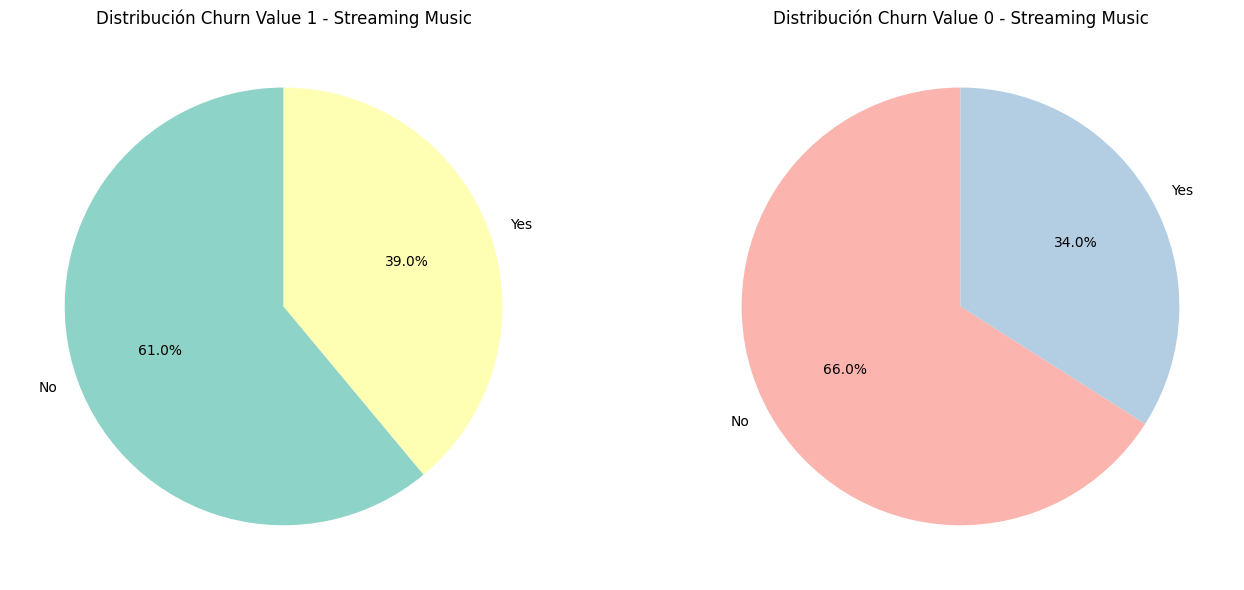

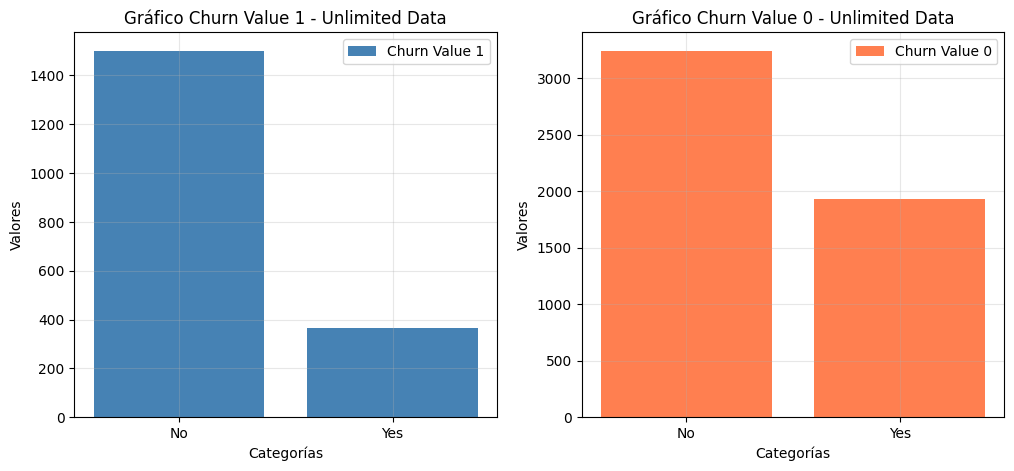

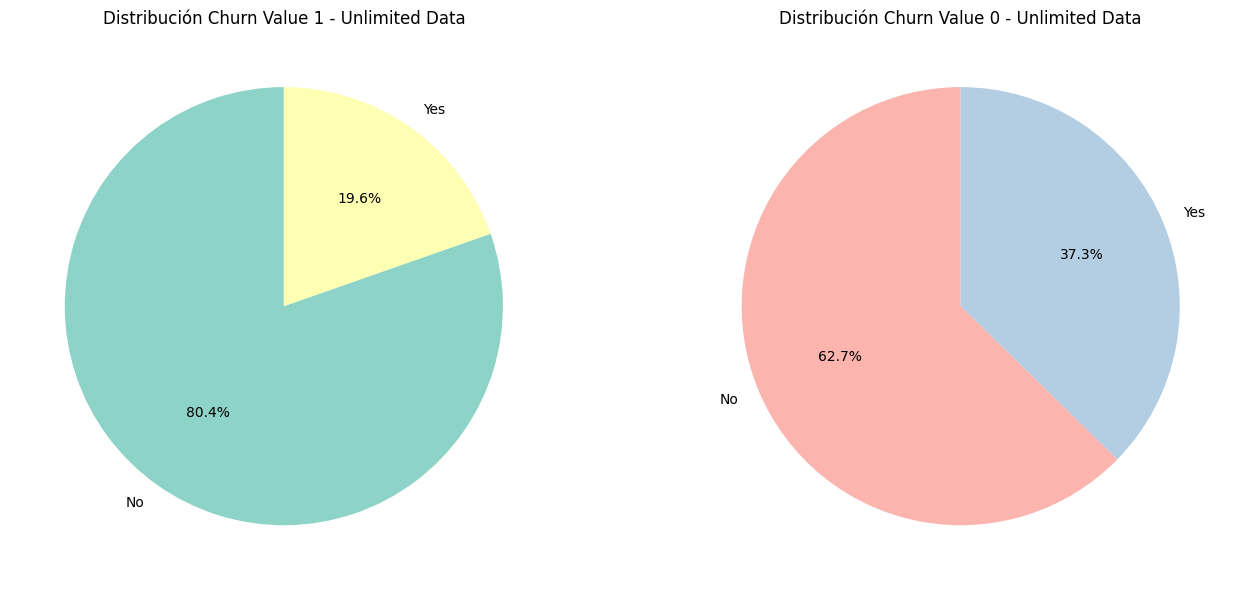

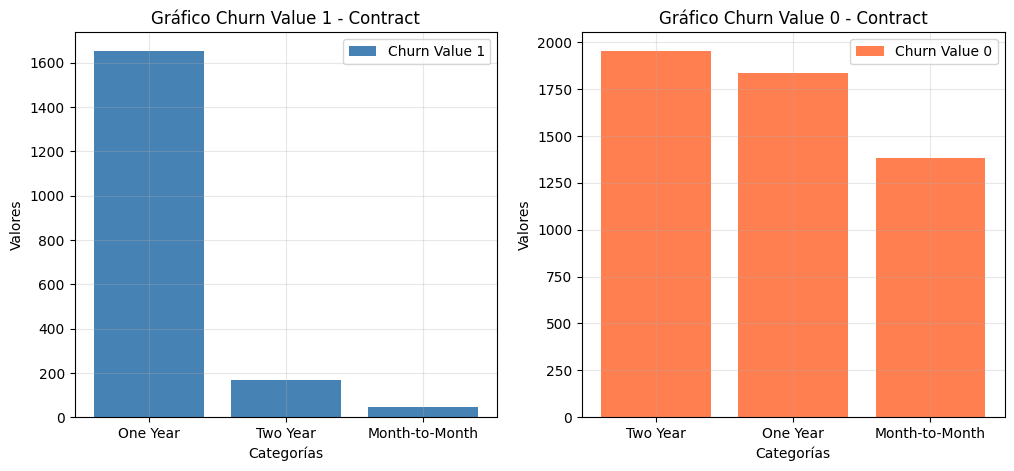

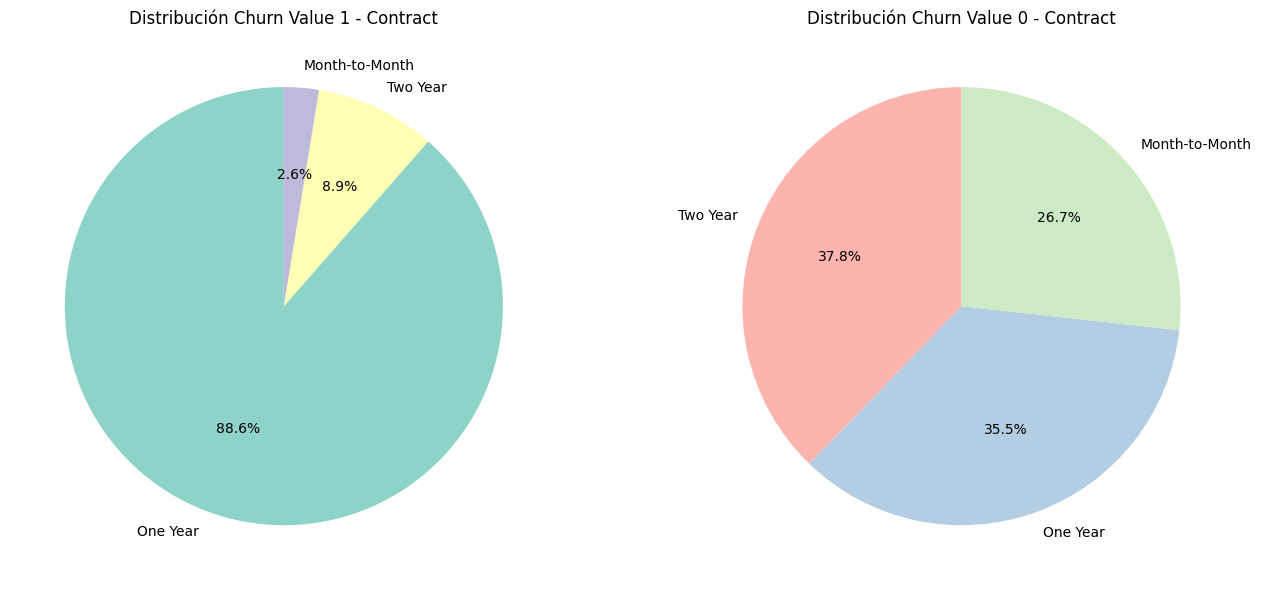

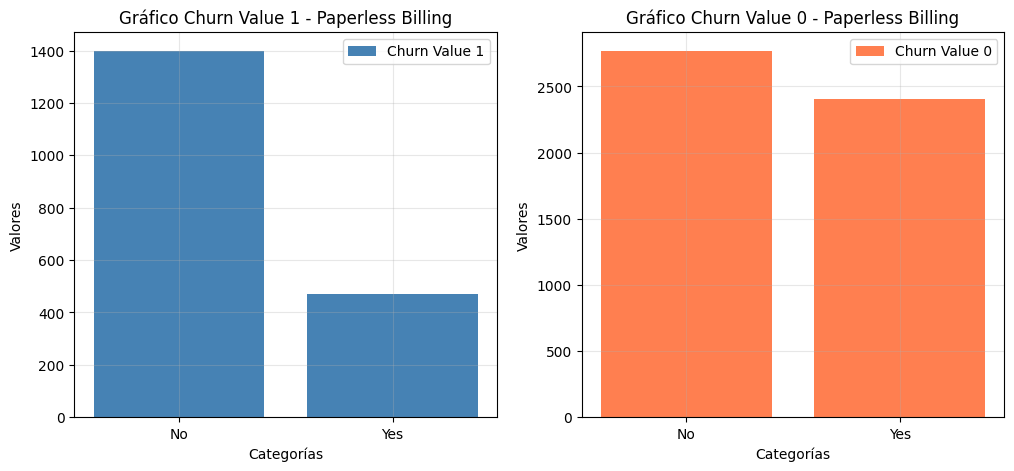

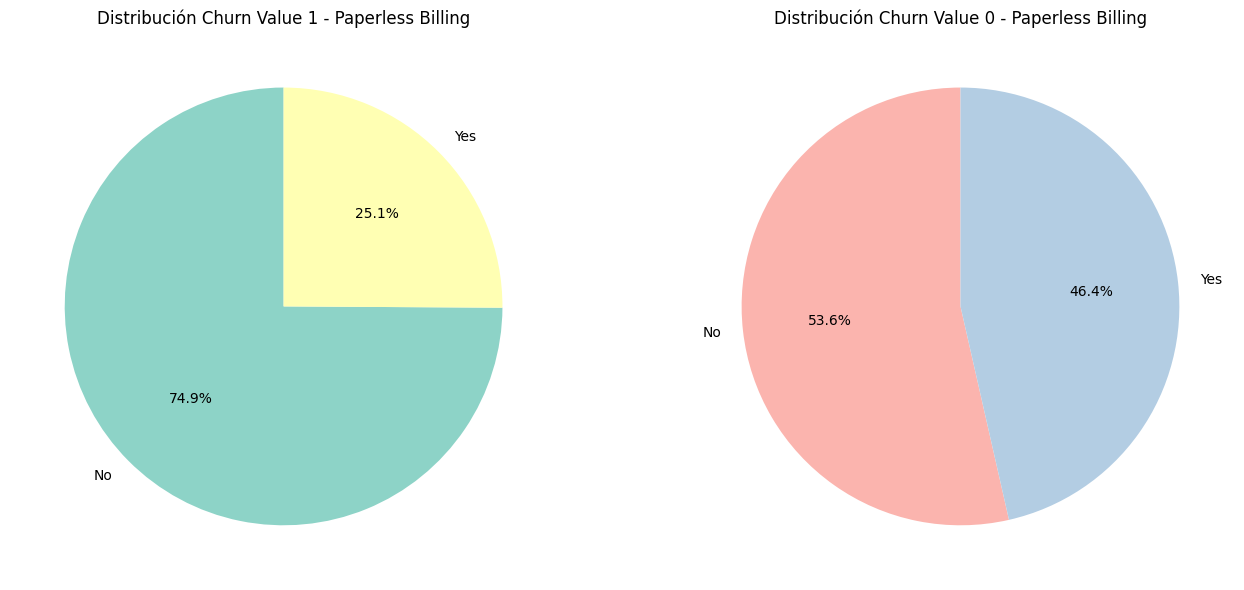

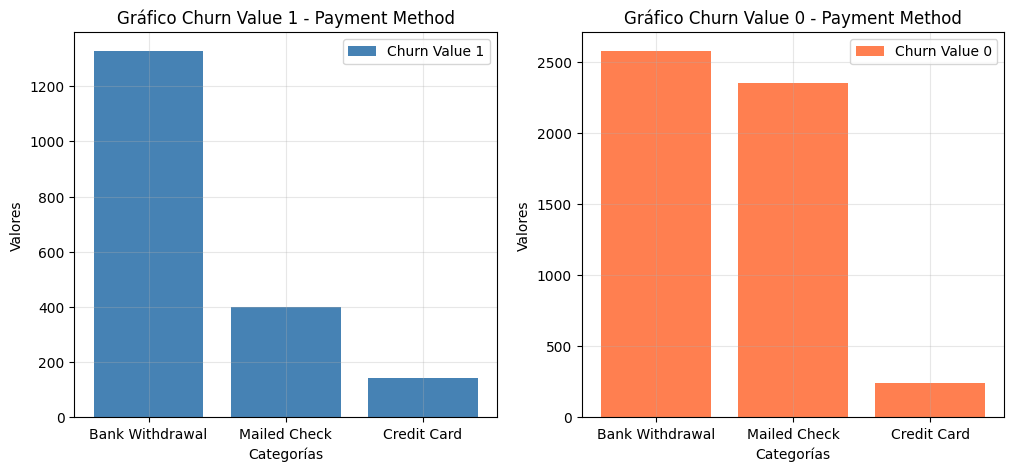

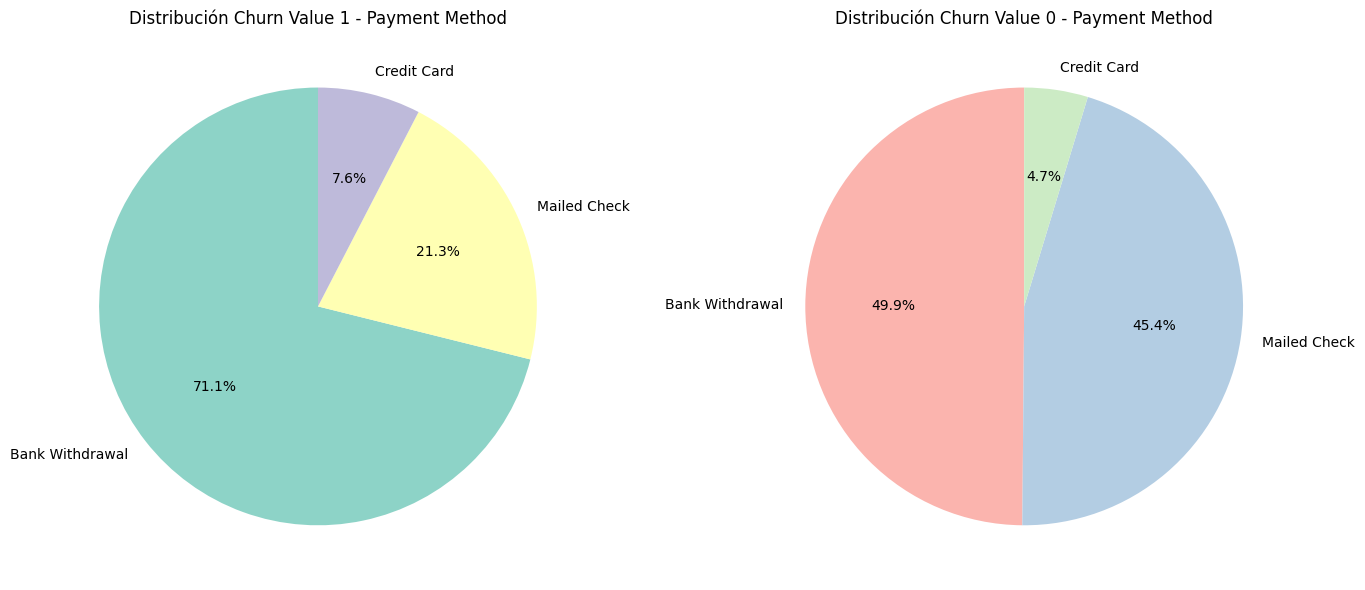

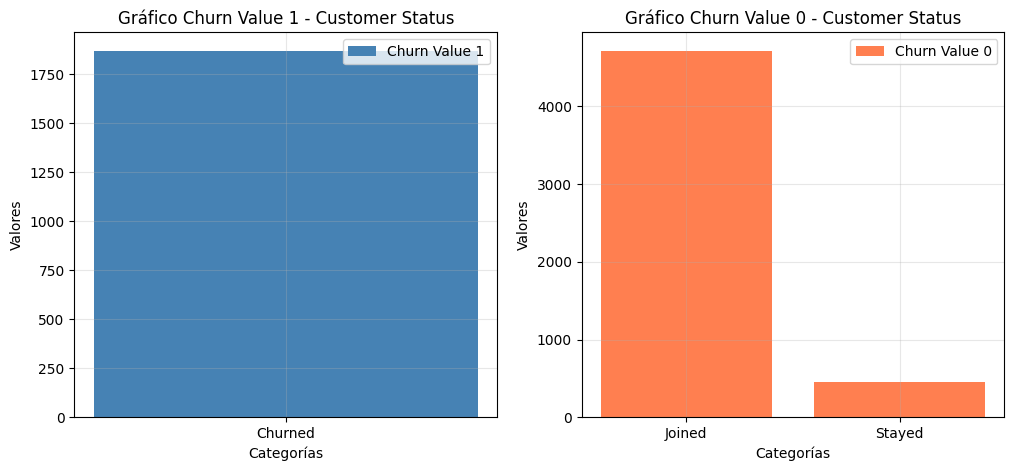

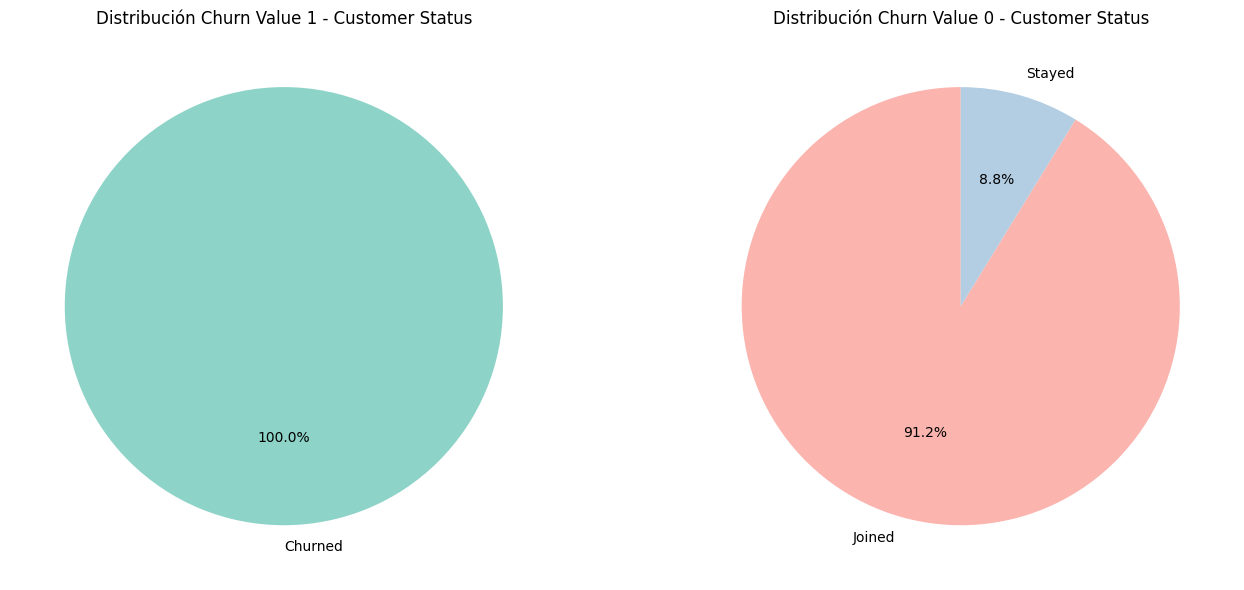

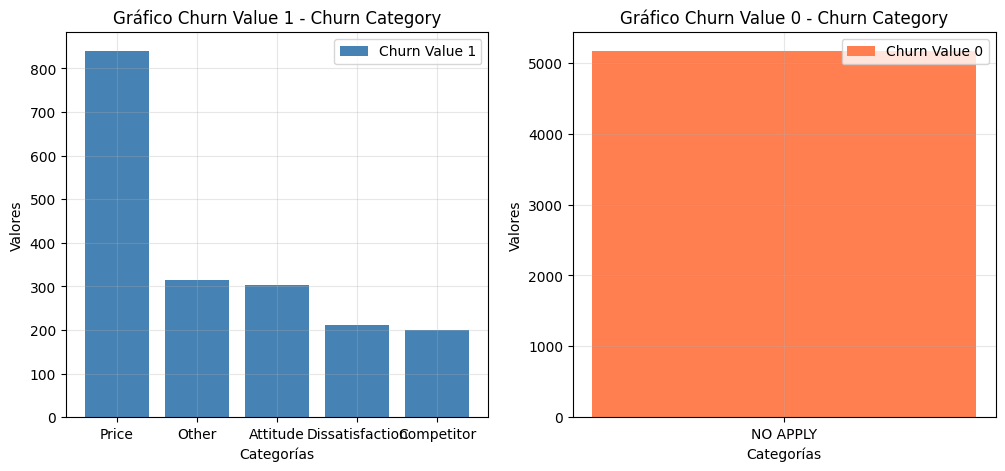

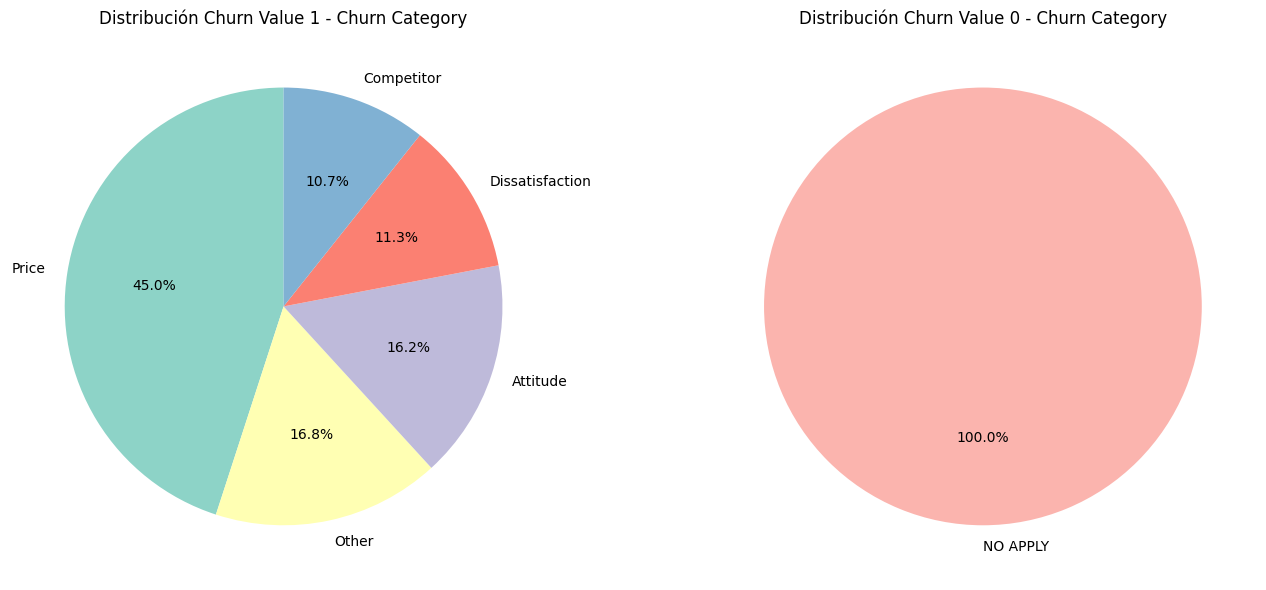

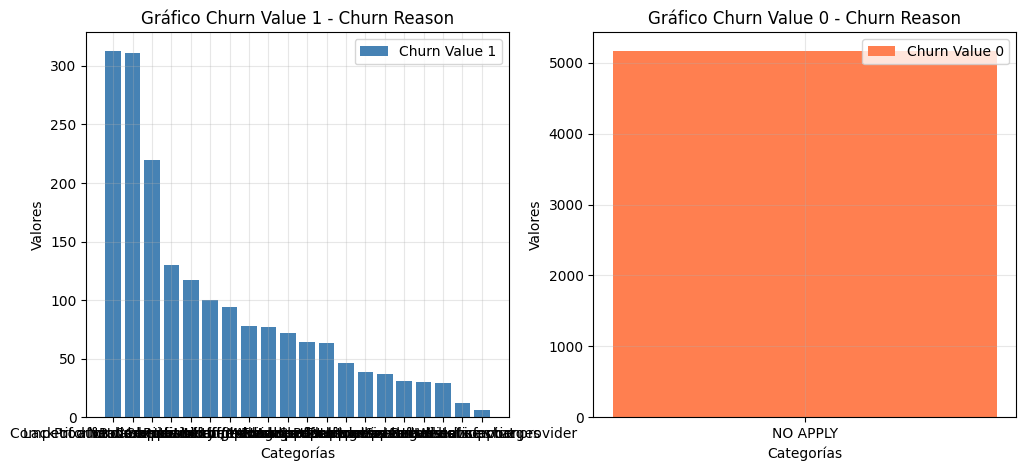

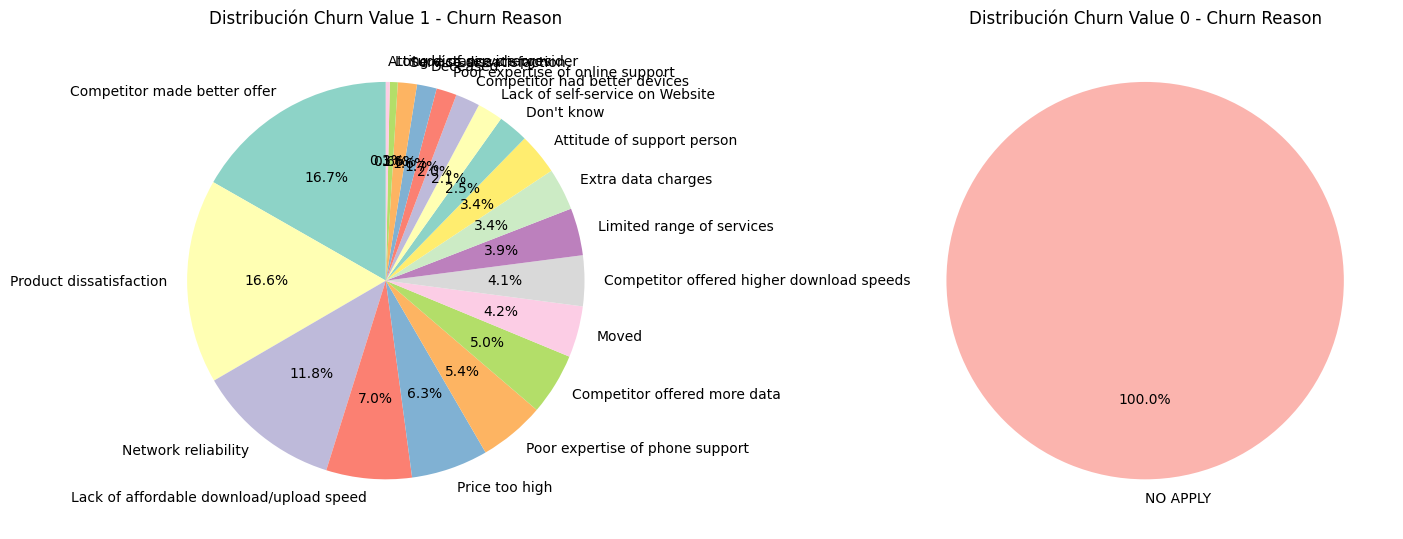

In [81]:
# print(users.columns)
for columna in users.columns:
    if users[columna].dtype in ["object"]:
        if columna not in ["Customer ID", "City"]: # DAN PROBLEMAS Y NO APORTAN NADA
            # print(f"Valores únicos en la columna {columna}:")
            # print(users[columna].unique())
            y1 = (users[(users["Churn Value"]==1)][columna].value_counts())
            x1 = x0 = list(set(users[(users["Churn Value"]==1)][columna]))
            y0 =(users[(users["Churn Value"]==0)][columna].value_counts())
            x0 = list(set(users[(users["Churn Value"]==0)][columna]))
            # print(f"x1 = {x1}")
            # print(f"y1 = {y1}")
            # print(f"x0 = {x0}")
            # print(f"y0 = {y0}")

            fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

            # Primer gráfico (izquierda) - solo x1, y1
            ax[0].bar(x1, y1, label="Churn Value 1", color='steelblue')
            ax[0].set_title(f'Gráfico Churn Value 1 - {columna}')
            ax[0].set_xlabel('Categorías')
            ax[0].set_ylabel('Valores')
            ax[0].legend()
            ax[0].grid(True, alpha=0.3)

            # Segundo gráfico (derecha) - solo x0, y0
            ax[1].bar(x0, y0, label="Churn Value 0", color='coral')
            ax[1].set_title(f'Gráfico Churn Value 0 - {columna}')
            ax[1].set_xlabel('Categorías')
            ax[1].set_ylabel('Valores')
            ax[1].legend()
            ax[1].grid(True, alpha=0.3)

            # plt.tight_layout()  # Ajusta el espaciado entre gráficos
            plt.show()

            fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

            # Primer gráfico circular (izquierda) - Churn Value 1
            ax[0].pie(y1, labels=x1, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
            ax[0].set_title(f'Distribución Churn Value 1 - {columna}')

            # Segundo gráfico circular (derecha) - Churn Value 0
            ax[1].pie(y0, labels=x0, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
            ax[1].set_title(f'Distribución Churn Value 0 - {columna}')

            plt.tight_layout()
            plt.show()




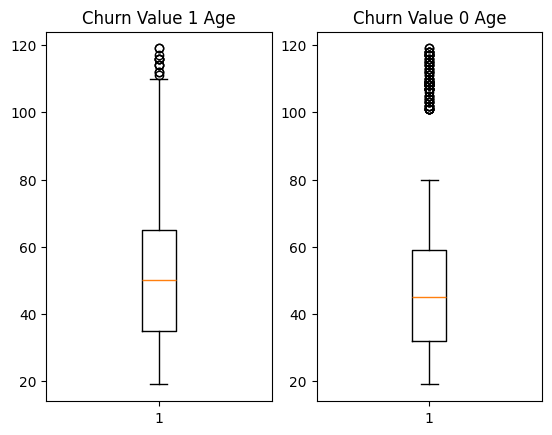

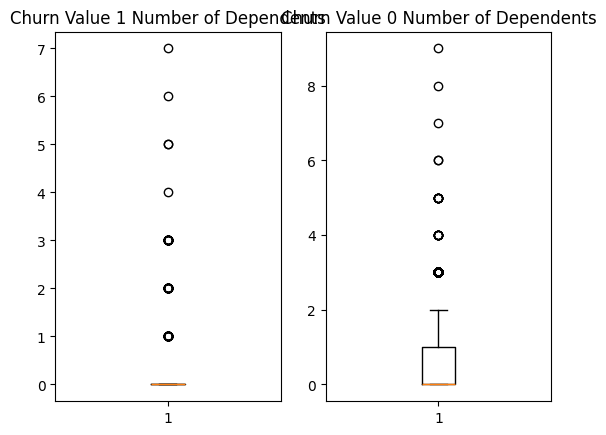

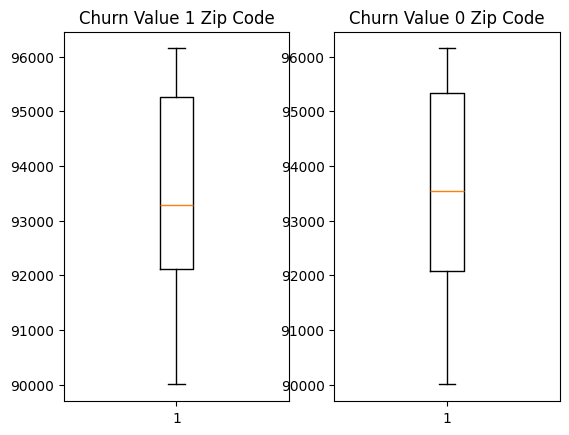

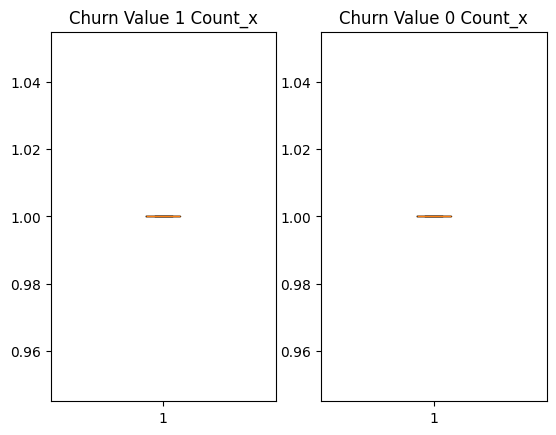

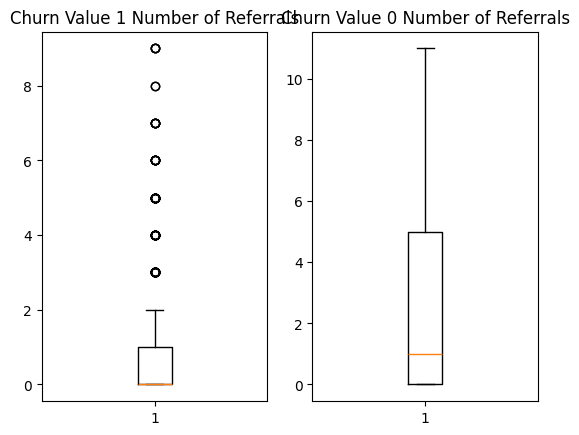

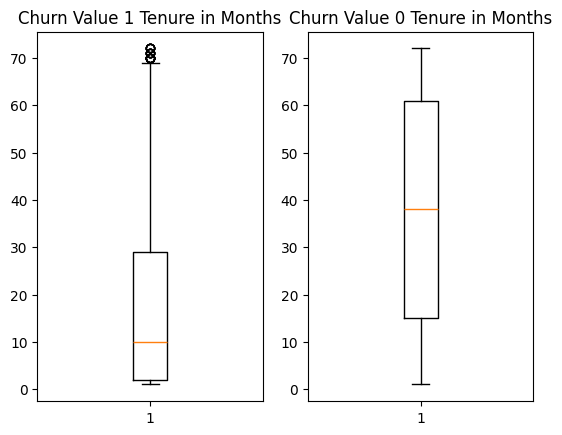

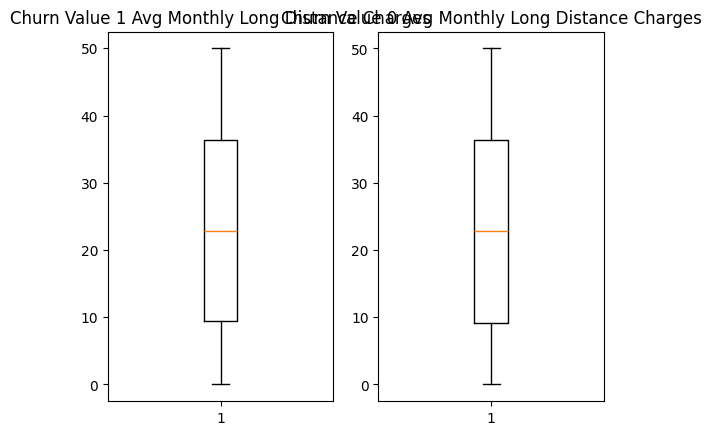

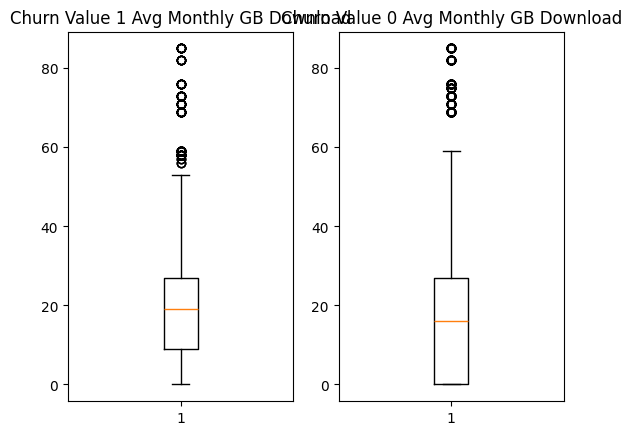

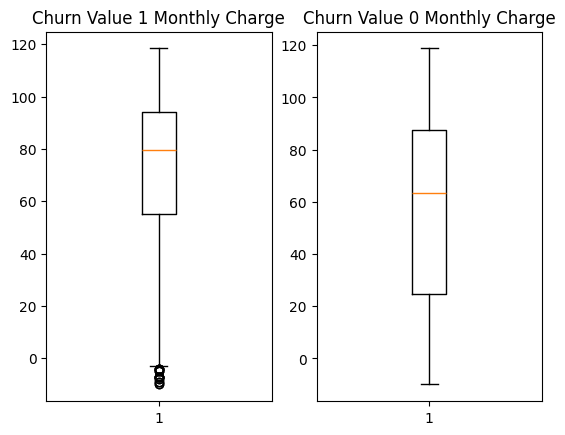

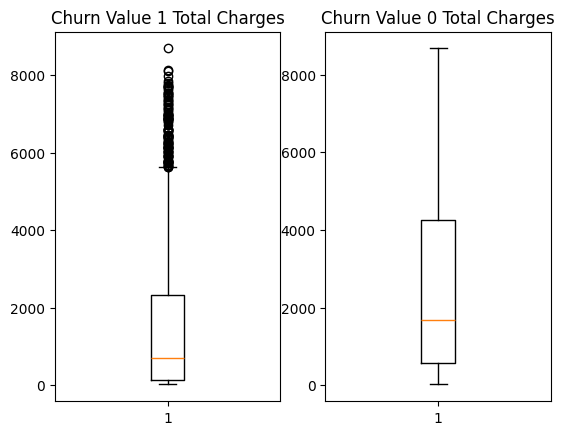

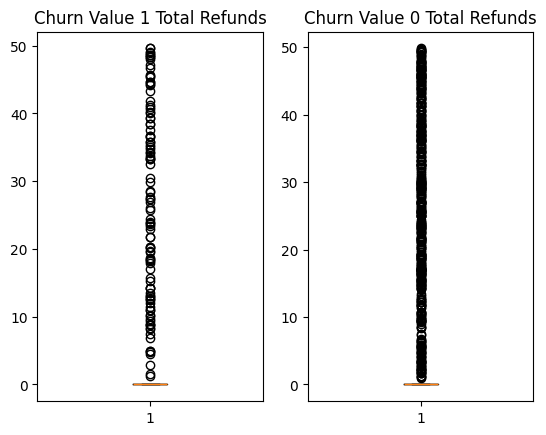

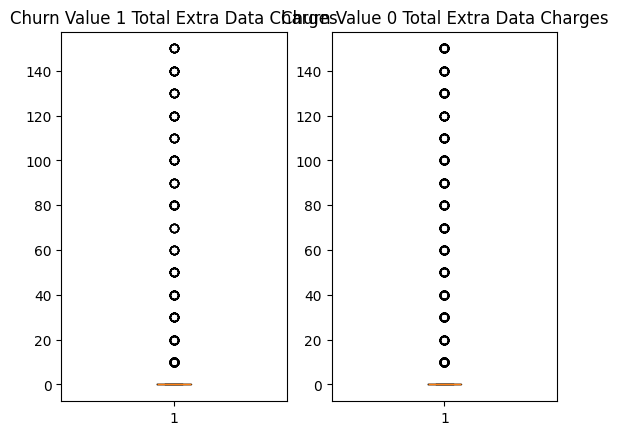

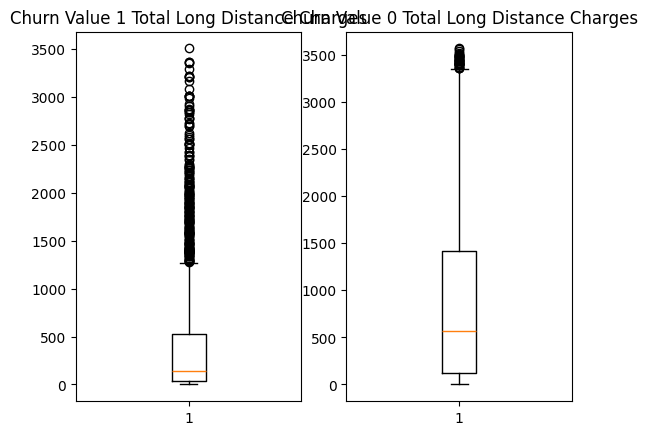

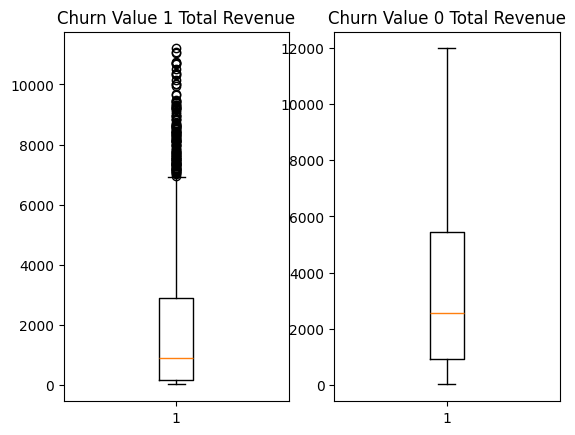

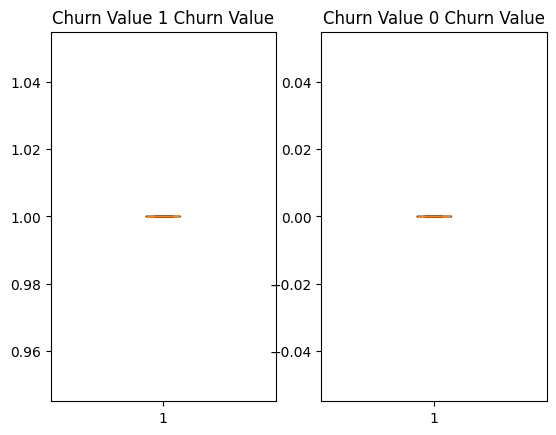

In [82]:
# print(users.columns)
for columna in users.columns:
    if users[columna].dtype in ['int64', 'float64']:
         y1 = users[(users["Churn Value"]==1)][columna]
         y0 = users[(users["Churn Value"]==0)][columna]
         fig, ax = plt.subplots(1,2)

         ax[0].boxplot(y1)
         ax[0].set_title(f'Churn Value 1 {columna}')


         ax[1].boxplot(y0)
         ax[1].set_title(f'Churn Value 0 {columna}')
         plt.show()

---
---
---


10. ESCALAMIENTO




################################
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


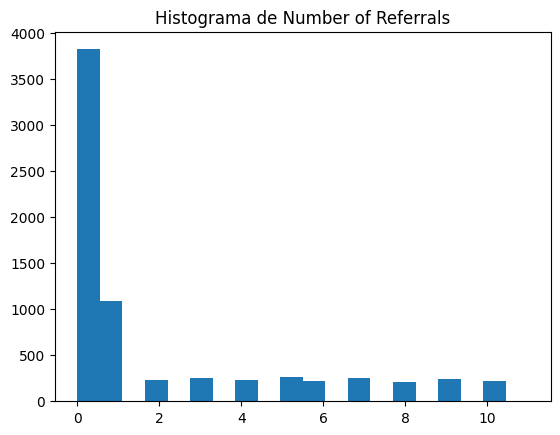

################################
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


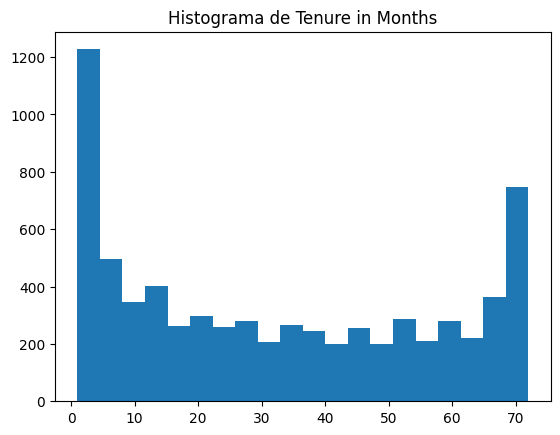

################################
3564.72


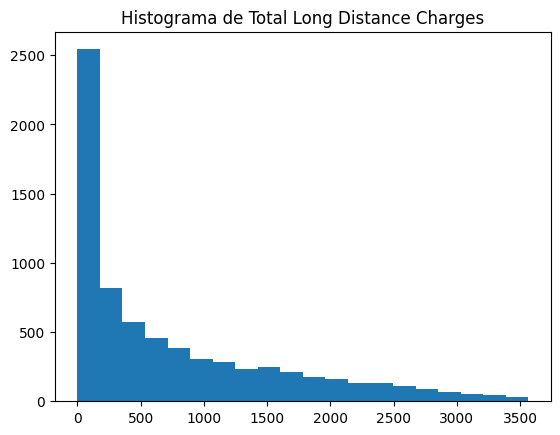

################################
11979.34


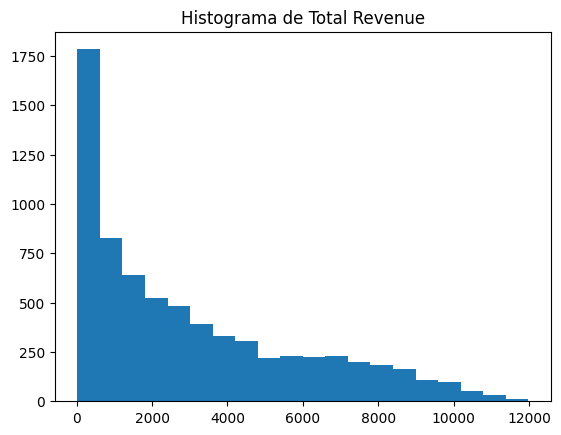

################################
Yes


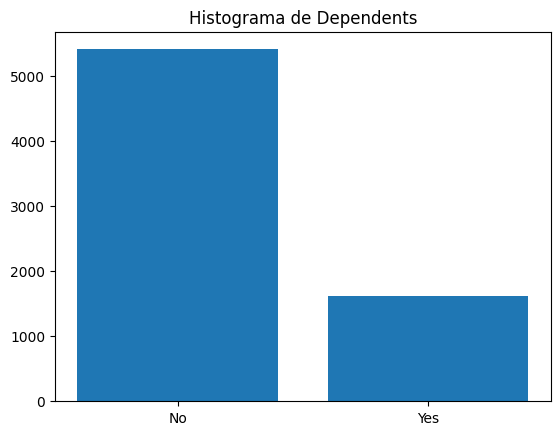

################################
Offer E


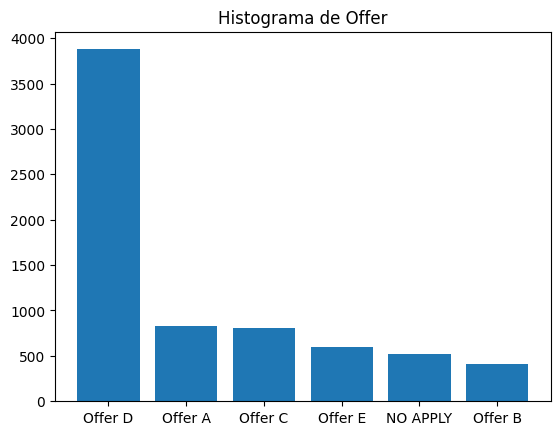

################################
Yes


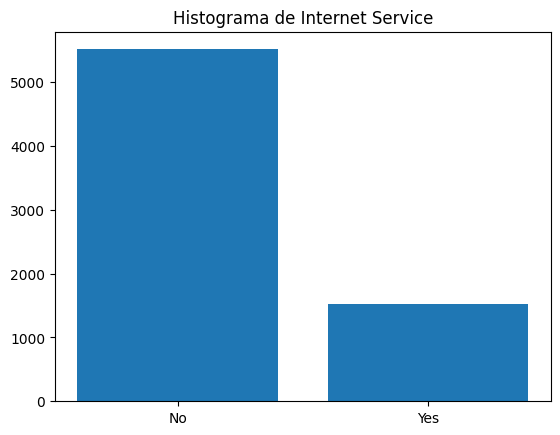

################################
NO APPLY


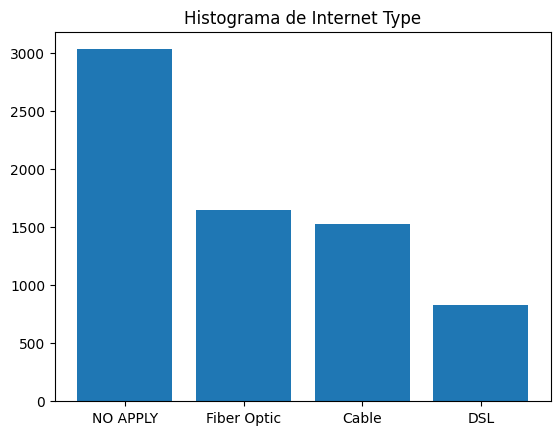

################################
Yes


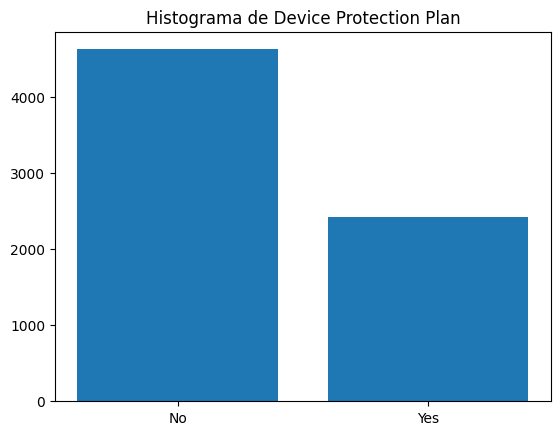

################################
Yes


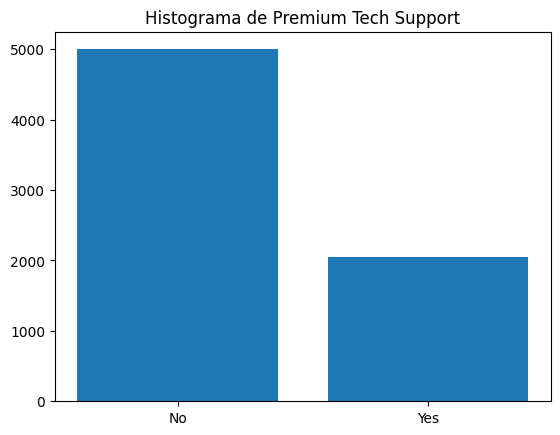

################################
Yes


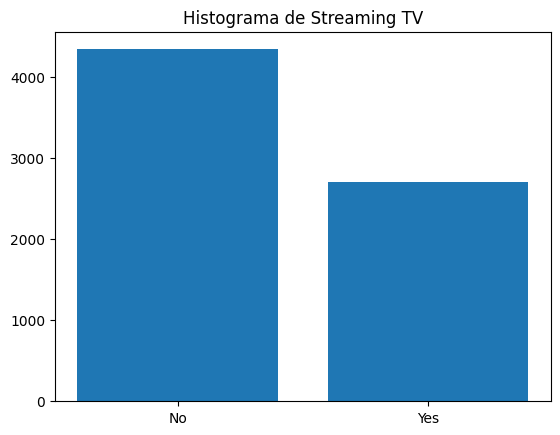

################################
Yes


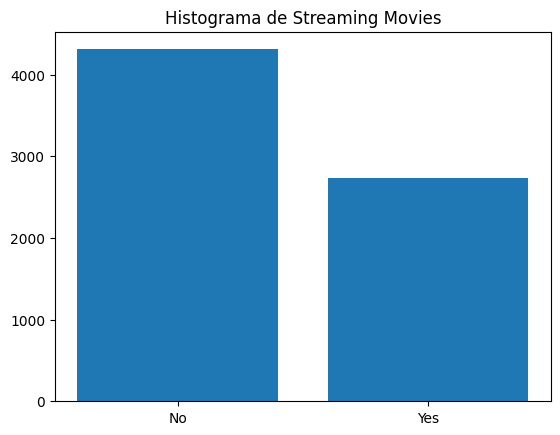

################################
Yes


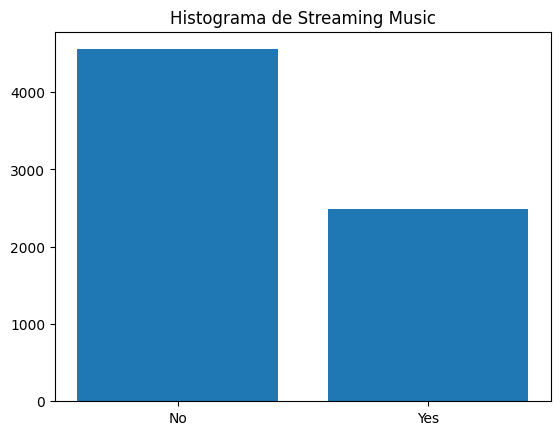

################################
Yes


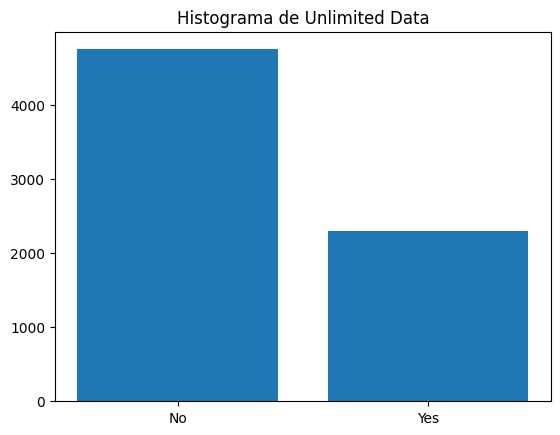

################################
Two Year


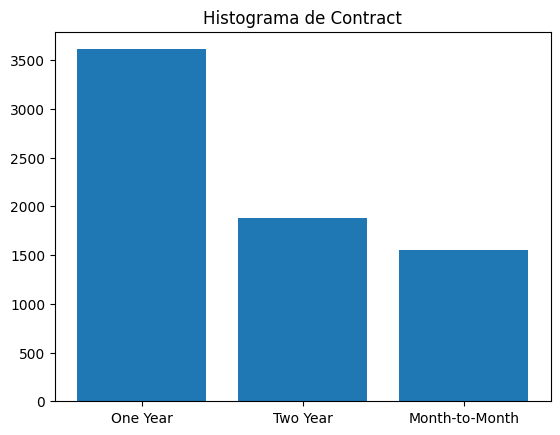

################################
Yes


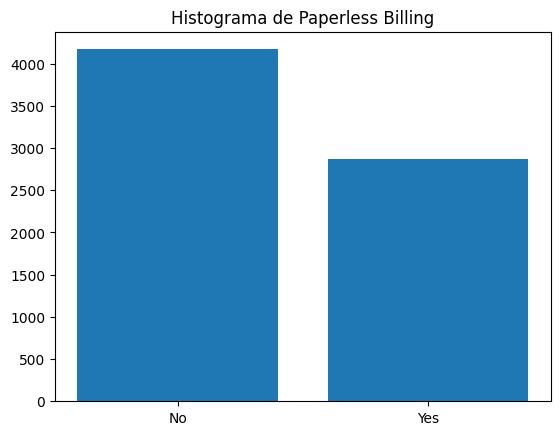

################################
Mailed Check


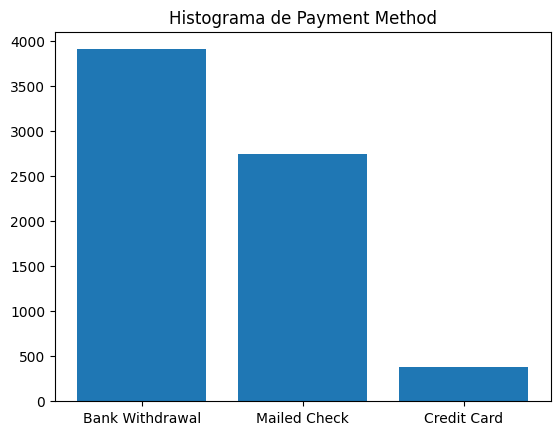

In [83]:
#users.columns
print("################################")

print(list(set(users['Number of Referrals'])))
fig, ax = plt.subplots()
ax.hist(users['Number of Referrals'], bins=20)
ax.set_title(f'Histograma de Number of Referrals')
plt.show()
print("################################")
print(list(set(users['Tenure in Months'])))
fig, ax = plt.subplots()
ax.hist(users['Tenure in Months'], bins=20)
ax.set_title(f'Histograma de Tenure in Months')
plt.show()
print("################################")
print(users['Total Long Distance Charges'].max())
fig, ax = plt.subplots()
ax.hist(users['Total Long Distance Charges'], bins=20)
ax.set_title(f'Histograma de Total Long Distance Charges')
plt.show()
print("################################")
print(users['Total Revenue'].max())
fig, ax = plt.subplots()
ax.hist(users['Total Revenue'], bins=20)
ax.set_title(f'Histograma de Total Revenue')
plt.show()
print("################################")
print(users['Dependents'].max())
fig, ax = plt.subplots()
y = users['Dependents'].value_counts()
x = list(set(users['Dependents']))
ax.bar(x, y)
ax.set_title(f'Histograma de Dependents')
plt.show()
print("################################")
print(users['Offer'].max())
fig, ax = plt.subplots()
y = users['Offer'].value_counts()
x = list(set(users['Offer']))
ax.bar(x, y)
ax.set_title(f'Histograma de Offer')
plt.show()
print("################################")
print(users['Internet Service'].max())
fig, ax = plt.subplots()
y = users['Internet Service'].value_counts()
x = list(set(users['Internet Service']))
ax.bar(x, y)
ax.set_title(f'Histograma de Internet Service')
plt.show()
print("################################")
print(users['Internet Type'].max())
fig, ax = plt.subplots()
y = users['Internet Type'].value_counts()
x = list(set(users['Internet Type']))
ax.bar(x, y)
ax.set_title(f'Histograma de Internet Type')
plt.show()
print("################################")
print(users['Device Protection Plan'].max())
fig, ax = plt.subplots()
y = users['Device Protection Plan'].value_counts()
x = list(set(users['Device Protection Plan']))
ax.bar(x, y)
ax.set_title(f'Histograma de Device Protection Plan')
plt.show()
print("################################")
print(users['Premium Tech Support'].max())
fig, ax = plt.subplots()
y = users['Premium Tech Support'].value_counts()
x = list(set(users['Premium Tech Support']))
ax.bar(x, y)
ax.set_title(f'Histograma de Premium Tech Support')
plt.show()
print("################################")
print(users['Streaming TV'].max())
fig, ax = plt.subplots()
y = users['Streaming TV'].value_counts()
x = list(set(users['Streaming TV']))
ax.bar(x, y)
ax.set_title(f'Histograma de Streaming TV')
plt.show()
print("################################")
print(users['Streaming Movies'].max())
fig, ax = plt.subplots()
y = users['Streaming Movies'].value_counts()
x = list(set(users['Streaming Movies']))
ax.bar(x, y)
ax.set_title(f'Histograma de Streaming Movies')
plt.show()
print("################################")
print(users['Streaming Music'].max())
fig, ax = plt.subplots()
y = users['Streaming Music'].value_counts()
x = list(set(users['Streaming Music']))
ax.bar(x, y)
ax.set_title(f'Histograma de Streaming Music')
plt.show()
print("################################")
print(users['Unlimited Data'].max())
fig, ax = plt.subplots()
y = users['Unlimited Data'].value_counts()
x = list(set(users['Unlimited Data']))
ax.bar(x, y)
ax.set_title(f'Histograma de Unlimited Data')
plt.show()
print("################################")
print(users['Contract'].max())
fig, ax = plt.subplots()
y = users['Contract'].value_counts()
x = list(set(users['Contract']))
ax.bar(x, y)
ax.set_title(f'Histograma de Contract')
plt.show()
print("################################")
print(users['Paperless Billing'].max())
fig, ax = plt.subplots()
y = users['Paperless Billing'].value_counts()
x = list(set(users['Paperless Billing']))
ax.bar(x, y)
ax.set_title(f'Histograma de Paperless Billing')
plt.show()
print("################################")
print(users['Payment Method'].max())
fig, ax = plt.subplots()
y = users['Payment Method'].value_counts()
x = list(set(users['Payment Method']))
ax.bar(x, y)
ax.set_title(f'Histograma de Payment Method')
plt.show()


1. VAMOS A PROCESAR LOS SIGUIENTES CAMPOS QUE HAN DEMOSTRADO SER IMPORTANTES:
- 'Number of Referrals' --> 0 1 2+
- 'Tenure in Months' --> 06 7-24 25-48 49+
- 'Total Long Distance Charges'--> 0-250 251-500 501-1000 1001-2000 +2001  
- 'Total Revenue'--> 0-500 501-1000 1001-1500 1501-2000 2001-3000 +3000
- 'Dependents'  --> 0 1
- 'Referred a Friend'--> 0 1
- 'Offer'--> ONE SHOT
- 'Internet Service' --> ONE SHOT
- 'Internet Type' --> ONE SHOT
- 'Device Protection Plan' --> 0 1
- 'Premium Tech Support' --> 0 1
- 'Streaming TV' --> 0 1
- 'Streaming Movies' --> 0 1
- 'Streaming Music' --> 0 1
- 'Unlimited Data' --> 0 1
- 'Contract' --> ONE SHOOT
- 'Paperless Billing' --> 0 1
- 'Payment Method' --> ONE SHOOT

EN RESUMEN SERA TODO 01

In [97]:
nuevo = users.copy()
# print(nuevo.columns)
# print(nuevo.shape)
nuevo = nuevo.drop(columns = ['Gender','Under 30', 'Senior Citizen', 'Married','Number of Dependents', 'City', 'Zip Code', 'Count_x','Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines','Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Monthly Charge', 'Total Charges', 'Total Refunds','Total Extra Data Charges','Customer Status', 'Churn Category', 'Churn Reason'])
# print(nuevo.shape)
columnas_numericas = list()
columnas_categoricas = list()
for columna in nuevo.columns:
    if nuevo[columna].dtype in ['int64', 'float64'] or columna in ['Dependents','Referred a Friend', 'Device Protection Plan','Premium Tech Support','Streaming TV' ,'Streaming Movies','Streaming Music','Unlimited Data', 'Paperless Billing', 'Internet Service']:
        columnas_numericas.append(columna)
    else:
        if columna != "Customer ID":
            columnas_categoricas.append(columna)
# print(columnas_numericas)
# print(columnas_categoricas)

# Codificar las categóricas
encoder = OneHotEncoder(sparse_output=False)
codificado = encoder.fit_transform(nuevo[columnas_categoricas])

# Crear DataFrame codificado
nombres = encoder.get_feature_names_out(columnas_categoricas)
df_codificado = pd.DataFrame(codificado, columns=nombres)

# Juntar con las columnas numéricas
dffinal = pd.concat([df_codificado, nuevo[columnas_numericas].reset_index(drop=True)], axis=1)

# print(dffinal.columns)
dffinal['Number of Referrals0'] = dffinal['Number of Referrals'].apply(lambda x: 1 if x==0 else 0)
dffinal['Number of Referrals1'] = dffinal['Number of Referrals'].apply(lambda x: 1 if x==1 else 0)
dffinal['Number of Referrals2+'] = dffinal['Number of Referrals'].apply(lambda x: 1 if x>=2 else 0)
dffinal['Tenure in Months0-6'] = dffinal['Tenure in Months'].apply(lambda x: 1 if x<=6 else 0)
dffinal['Tenure in Months7-24'] = dffinal['Tenure in Months'].apply(lambda x: 1 if x>=7 and x<=24 else 0)
dffinal['Tenure in Months25-48'] = dffinal['Tenure in Months'].apply(lambda x: 1 if x>=25 and x<=48 else 0)
dffinal['Tenure in Months49+'] = dffinal['Tenure in Months'].apply(lambda x: 1 if x>=49 else 0)
dffinal['Total Long Distance Charges0-250'] = dffinal['Total Long Distance Charges'].apply(lambda x: 1 if x<=250 else 0)
dffinal['Total Long Distance Charges251-500'] = dffinal['Total Long Distance Charges'].apply(lambda x: 1 if x>=251 and x<=500 else 0)
dffinal['Total Long Distance Charges501-1000'] = dffinal['Total Long Distance Charges'].apply(lambda x: 1 if x>=501 and x<=1000 else 0)
dffinal['Total Long Distance Charges1001-2000'] = dffinal['Total Long Distance Charges'].apply(lambda x: 1 if x>=1001 and x<=2000 else 0)
dffinal['Total Long Distance Charges2001+'] = dffinal['Total Long Distance Charges'].apply(lambda x: 1 if x>=2001 else 0)
dffinal['Total Revenue0-500'] = dffinal['Total Revenue'].apply(lambda x: 1 if x<=500 else 0)
dffinal['Total Revenue501-1000'] = dffinal['Total Revenue'].apply(lambda x: 1 if x>=501 and x<=1000 else 0)
dffinal['Total Revenue1001-1500'] = dffinal['Total Revenue'].apply(lambda x: 1 if x>=1001 and x<=1500 else 0)
dffinal['Total Revenue1501-2000'] = dffinal['Total Revenue'].apply(lambda x: 1 if x>=1501 and x<=2000 else 0)
dffinal['Total Revenue2001-3000'] = dffinal['Total Revenue'].apply(lambda x: 1 if x>=2001 and x<=3000 else 0)
dffinal['Total Revenue3000+'] = dffinal['Total Revenue'].apply(lambda x: 1 if x>=3000 else 0)
dffinal['Dependents'] =   dffinal['Dependents'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Referred a Friend'] =   dffinal['Referred a Friend'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Device Protection Plan'] =   dffinal['Device Protection Plan'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Premium Tech Support'] =   dffinal['Premium Tech Support'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Streaming TV'] =   dffinal['Streaming TV'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Streaming Movies'] =   dffinal['Streaming Movies'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Streaming Music'] =   dffinal['Streaming Music'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Unlimited Data'] =   dffinal['Unlimited Data'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Paperless Billing'] =   dffinal['Paperless Billing'].apply(lambda x: 1 if x=="Yes" else 0)
dffinal['Internet Service'] =   dffinal['Internet Service'].apply(lambda x: 1 if x=="Yes" else 0)
# print(dffinal)
print(dffinal.shape)
# print(dffinal.describe())
datafinal = dffinal.drop(columns = ['Number of Referrals', 'Tenure in Months', 'Total Long Distance Charges', 'Total Revenue'])
# print(datafinal.columns)
print(datafinal.shape)
print(datafinal)

(7043, 50)
(7043, 46)
      Offer_NO APPLY  Offer_Offer A  Offer_Offer B  Offer_Offer C  \
0                1.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            1.0   
4                0.0            0.0            0.0            1.0   
...              ...            ...            ...            ...   
7038             1.0            0.0            0.0            0.0   
7039             0.0            0.0            0.0            0.0   
7040             1.0            0.0            0.0            0.0   
7041             1.0            0.0            0.0            0.0   
7042             0.0            0.0            0.0            1.0   

      Offer_Offer D  Offer_Offer E  Internet Type_Cable  Internet Type_DSL  \
0               0.0            0.0                  0.0                

---
---
---


11. ENTRENAMIENTO


In [98]:
Y = datafinal['Churn Value']
X = datafinal.drop(columns = ['Churn Value'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



---
---
---


12. COMPROBACION


[[1403  154]
 [ 182  374]]


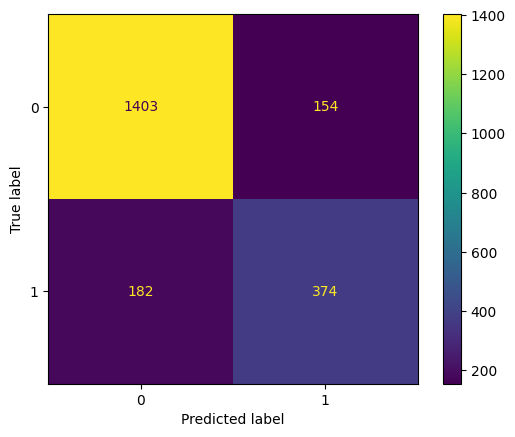

In [99]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

---
---
---


13. ROC


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1557
           1       0.71      0.67      0.69       556

    accuracy                           0.84      2113
   macro avg       0.80      0.79      0.79      2113
weighted avg       0.84      0.84      0.84      2113



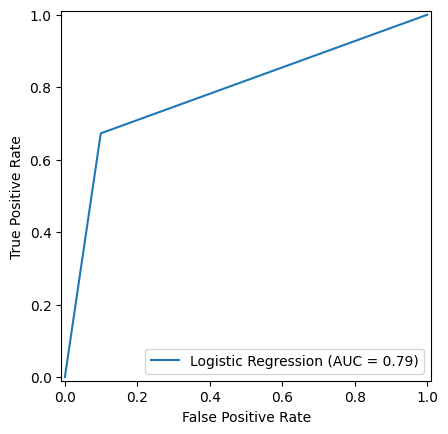

In [100]:


print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()


---
---
---


14. HIPERPARAMETROS


- INTENTAMOS CON KNN Y VEMOS SI MEJORA CON PARAMETROS
- SVC TAMBIEN LO INTENTAMOS

######    KNN     ######
K = 1
0.709607458541837
K = 2
0.6713167038623437
K = 3
0.7501374622845077
K = 4
0.7191726387675986
K = 5
0.7517425366065528
K = 6
0.7383145506716016
K = 7
0.7669656182568395
K = 8
0.7490423845894382
K = 9
0.7669656182568395
K = 10
0.7435825905749389
K = 11
0.7631114761370095
K = 12
0.7548238865554955
K = 13
0.7676078790147073
K = 14
0.7597061079460131
K = 15
0.7679295869662652
K = 16
0.7633032302481713
K = 17
0.77011338905754
K = 18
0.7576505269772622
K = 19
0.7699845903623922
K = 20
0.7572652860370662
K = 21
0.7718472620747332
K = 22
0.7660651825360522
K = 23
0.7734529139694024
K = 24
0.7658722732796421
K = 25
0.7692135309093765
K = 26
0.7576505269772622
K = 27
0.7624045272452558
K = 28
0.7588709379317354
K = 29
0.7685706925788849
K = 30
0.7589350484929976
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1557
           1       0.69      0.62      0.65       556

    accuracy                           0.83

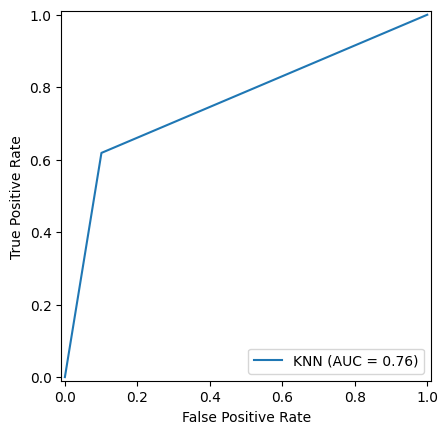

######    LINEAR     ######
C=0
0.7882254889729835
x = 0.01
0.7862340185654945
x = 0.02
0.7879684691553115
x = 0.03
0.7858487776252985
x = 0.04
0.7861699080042324
x = 0.05
0.7864269278219044
x = 0.06
0.7864269278219044
x = 0.07
0.7864269278219044
x = 0.1
0.7864269278219044
x = 0.2
0.7873262083974438
0.7882254889729835
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1557
           1       0.72      0.67      0.69       556

    accuracy                           0.84      2113
   macro avg       0.80      0.79      0.79      2113
weighted avg       0.84      0.84      0.84      2113



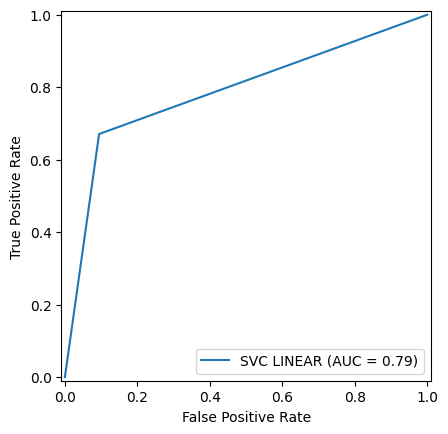

######    POLY     ######
C=0
0.7679913872370313
x = 0.01 grados = 1
0.5113695171030807
x = 0.01 grados = 2
0.5
x = 0.01 grados = 3
0.5
x = 0.01 grados = 4
0.5
x = 0.01 grados = 5
0.5
x = 0.05 grados = 1
0.7625945486385457
x = 0.05 grados = 2
0.6157524847174285
x = 0.05 grados = 3
0.57933075504914
x = 0.05 grados = 4
0.5322458795969005
x = 0.05 grados = 5
0.5161229397984503
x = 0.1 grados = 1
0.7757632044653295
x = 0.1 grados = 2
0.6807588611191971
x = 0.1 grados = 3
0.6609735333120786
x = 0.1 grados = 4
0.5731640121428868
x = 0.1 grados = 5
0.5521588509539189
x = 0.2 grados = 1
0.7833432675824658
x = 0.2 grados = 2
0.7293847003322198
x = 0.2 grados = 3
0.7275855616085165
x = 0.2 grados = 4
0.6684889082953291
x = 0.2 grados = 5
0.6010422875572374
x = 0.3 grados = 1
0.7853988485512169
x = 0.3 grados = 2
0.7415893874495779
x = 0.3 grados = 3
0.7424886680251175
x = 0.3 grados = 4
0.6971382431626952
x = 0.3 grados = 5
0.6573764110099204
x = 0.4 grados = 1
0.7874544295199677
x = 0.4 grados 

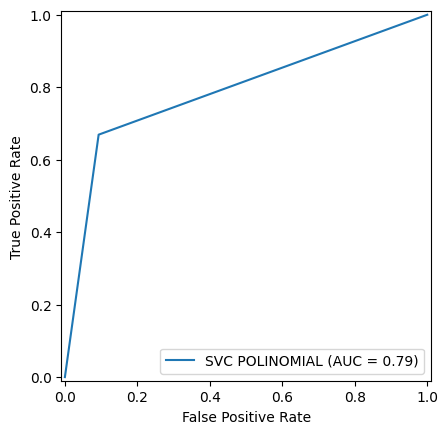

SE HACE TAMBIEN CON SVC RBF PERO TARDA MUCHO, DESCOMENTAR EN CODIGO PARA VERLO
0.7841784375967433
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1557
           1       0.72      0.66      0.69       556

    accuracy                           0.84      2113
   macro avg       0.80      0.78      0.79      2113
weighted avg       0.84      0.84      0.84      2113



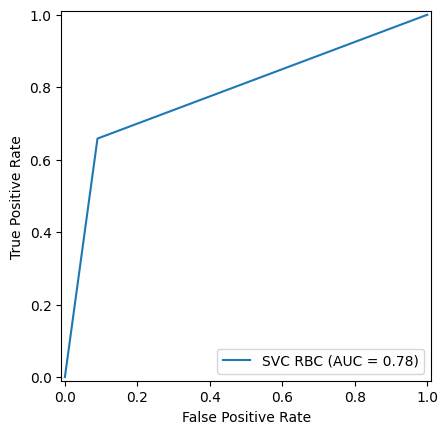

In [101]:
## INTENTO CON KNN
print("######    KNN     ######")
for x in range(1,31):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f"K = {x}")
    print(roc_auc)

model = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train_scaled, y_train)

print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot()
plt.show()


## INTENTO CON SVC LINEAL
print("######    LINEAR     ######")
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"C=0")
print(roc_auc)
for x in [ 0.01,0.02,  0.03,  0.04,  0.05, 0.06, 0.07, 0.1,0.2]:
    model = SVC(kernel='linear', C=x)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f"x = {x}")
    print(roc_auc)

## EL MEJOR PARA LINEAL ES 78.82 CON C= BLANCO
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC LINEAR')
display.plot()
plt.show()

## INTENTO CON SVC POLINOMIAL
print("######    POLY     ######")
model = SVC(kernel='poly', gamma="auto")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"C=0")
print(roc_auc)
for x in [ 0.01, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    for z in [1,2,3,4,5]:
        model = SVC(kernel='poly', gamma="auto", C=x, degree=z)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        print(f"x = {x} grados = {z}")
        print(roc_auc)

## EL MEJOR PARA polinomial ES 78.7 CON C= 0.9 grados = 1
model = SVC(kernel='poly', gamma="auto", C=0.9, degree=1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC POLINOMIAL')
display.plot()
plt.show()

## INTENTO CON SVC RBF
print("SE HACE TAMBIEN CON SVC RBF PERO TARDA MUCHO, DESCOMENTAR EN CODIGO PARA VERLO")
# print("######    RBF     ######")
# model = SVC(kernel='rbf', gamma="auto")
# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# print(f"C=0")
# print(roc_auc)
# for x in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
#     for z in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
#         model = SVC(kernel='rbf', gamma=z, C=x)
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)
#         fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#         roc_auc = auc(fpr, tpr)
#         print(f"x = {x} gamma = {z}")
#         print(roc_auc)

#EL MEJOR ES EL BLANCO
model = SVC(kernel='rbf', gamma="auto")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC RBC')
display.plot()
plt.show()



---
---
---


15. PRUEBA
- COGEMOS REGRESION LOGISTICA QUE NOS DA BUENOS RESULTADOS Y CREAMOS EL MODELO
- LO VOLVEMOS A ENTRENAR POR SI HAY CORRUPCION
- LO VOLVEMOS A PROBAR
- HACEMOS UN TEST CON VALORES
  



0.7868768568959861
['Offer_NO APPLY', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_NO APPLY', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card', 'Payment Method_Mailed Check', 'Age', 'Dependents', 'Referred a Friend', 'Internet Service', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Number of Referrals0', 'Number of Referrals1', 'Number of Referrals2+', 'Tenure in Months0-6', 'Tenure in Months7-24', 'Tenure in Months25-48', 'Tenure in Months49+', 'Total Long Distance Charges0-250', 'Total Long Distance Charges251-500', 'Total Long Distance Charges501-1000', 'Total Long Distance Charges1001-2000', 'Total Long Distance Charges2001+', 'Total Revenue0-500', 'Total Revenue501-1000', 'Tot

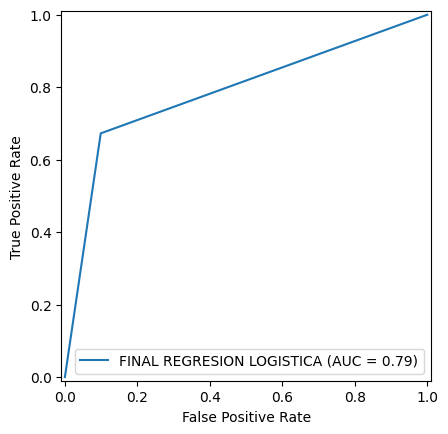

In [107]:
Y = datafinal['Churn Value']
X = datafinal.drop(columns = ['Churn Value'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

print(X_train.columns.tolist())
print(f"\nTotal de features: {len(X_train.columns)}")
print("\nEjemplo de una fila:")
print(X_train.iloc[0])

# 1. Ver qué columnas necesitas
print("Columnas del modelo:")
print(X_train.columns.tolist())

# 2. Crear datos de prueba
nuevo_cliente = {}
for col in X_train.columns:
    # Usar la media de cada columna como ejemplo
    nuevo_cliente[col] = X_train[col].mean()
################ INTRODUZO UNO YO##########################
nuevo_cliente = {
    'Offer_NO APPLY': 0,
    'Offer_Offer A': 0,
    'Offer_Offer B': 0,
    'Offer_Offer C': 0,
    'Offer_Offer D': 0,
    'Offer_Offer E': 0,
    'Internet Type_Cable': 0,
    'Internet Type_DSL': 0,
    'Internet Type_Fiber Optic': 1,
    'Internet Type_NO APPLY': 0,
    'Contract_Month-to-Month': 0,
    'Contract_One Year': 1,
    'Contract_Two Year': 0,
    'Payment Method_Bank Withdrawal': 1,
    'Payment Method_Credit Card': 0,
    'Payment Method_Mailed Check': 0,
    'Age': 20,
    'Dependents': 0,
    'Referred a Friend': 0,
    'Internet Service': 1,
    'Device Protection Plan': 0,
    'Premium Tech Support': 0,
    'Streaming TV': 1,
    'Streaming Movies': 1,
    'Streaming Music': 1,
    'Unlimited Data': 1,
    'Paperless Billing': 1,
    'Number of Referrals0': 0,
    'Number of Referrals1': 0,
    'Number of Referrals2+': 1,
    'Tenure in Months0-6': 0,
    'Tenure in Months7-24': 0,
    'Tenure in Months25-48': 0,
    'Tenure in Months49+': 1,
    'Total Long Distance Charges0-250': 0,
    'Total Long Distance Charges251-500': 0,
    'Total Long Distance Charges501-1000': 0,
    'Total Long Distance Charges1001-2000': 0,
    'Total Long Distance Charges2001+': 1,
    'Total Revenue0-500': 0,
    'Total Revenue501-1000': 0,
    'Total Revenue1001-1500': 0,
    'Total Revenue1501-2000': 1,
    'Total Revenue2001-3000': 0,
    'Total Revenue3000+': 0
}

# 3. Convertir a DataFrame
df_nuevo = pd.DataFrame([nuevo_cliente])

# 4. Escalar
nuevo_scaled = scaler.transform(df_nuevo)

# 5. Predecir
pred = model.predict(nuevo_scaled)
prob = model.predict_proba(nuevo_scaled)

# 6. Mostrar resultado
print(f"\n{'='*50}")
print(f"RESULTADO DE LA PREDICCIÓN")
print(f"{'='*50}")
print(f"Predicción: {'⚠️ CHURN' if pred[0] == 1 else '✅ NO CHURN'}")
print(f"Probabilidad de No Churn: {prob[0][0]:.2%}")
print(f"Probabilidad de Churn: {prob[0][1]:.2%}")
print(f"{'='*50}")

# 7. Probabilidad de acierto

print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='FINAL REGRESION LOGISTICA')
display.plot()
plt.show()

---
---
---